# Text Analysis of the Australian Skills Classification (ASC)


## 1. **Introduction**
As skills become increasingly important in workforce development, it is necessary to grasp the strengths and shortcomings of the Australian Skills Classification (ASC), which is a system for categorizing skills, competencies, and tasks across many occupations. This report aims to analyze the ASC dataset using NLP approaches to explore:
- Its structure and categorization.
- Determine patterns, strengths, and weaknesses in skill classification.
- Evaluate the efficiency of categorization by comparing ASC to another dataset based on a subset of Data Scientist jobs' related to their occupation-specific information and occupational requirements, taken from **O*NET OnLine**.

According to an analysis of existing skills shortages, 36% of jobs analyzed were in national scarcity (332 out of 916) in 2023, which is 5% more than the Skills Priority List (SPL) for 2022.  When compared to the 2022 SPL, 66 (or 7%) jobs were newly in short supply in 2023, with the majority of these being high-skilled professional occupations such as Sales and Marketing Manager, Taxation Accountant, Biomedical Engineer, and Solicitor. In addition, 266 vocations (or 29%) were in short supply in both years. 47% of them were in professional employment, notably in health, engineering, computer communication technology (ICT), and science. Another 33% were employed in various technician and trade sectors. Three successive years of the SPL allow us to analyze the persistence of skills shortages. The overarching result of this assessment is how chronic various skill shortages are (*Current Skills Shortages*, 2023). In this study, data preprocessing, exploratory analysis, topic modeling, and clustering are used to gain insights that can improve skill taxonomy and workforce planning.

Data Source for ASC: https://www.jobsandskills.gov.au/data
ONet Data Source: https://www.onetonline.org/link/summary/15-2051.00 

## 2. **Technical Details**
The study utilizes and analyses text data from ASC using Python-based NLP packages. Python-based NLP and data analysis libraries are employed to properly analyse the dataset. Every library has a distinct function.

- `pandas` is implemented to read and manipulate structured data from the Excel data file.
- `numpy` is employed for numerical calculations in order to effectively process datasets.
- To create visualisations like bar charts, histograms, and heatmaps, use `matplotlib` and `seaborn` are used.
- Tasks related to Natural Language Processing (NLP), such as Named Entity Recognition (NER), tokenisation, and stopword elimination are done using `nltk` and `spacy`.
- `wordcloud` is used for frequent word visualization.  
- Topic modelling (LDA) and other advanced NLP tasks are handled by `gensim`.
- Interactive topic modelling visualisations are made with `pyLDAvis`.  
- For machine learning methods like PCA, K-Means clustering, and TF-IDF, `scikit-learn` is utilised.

Installing these libraries and packages is required because they improve text processing capabilities for skill description analysis. These can extract insights from unstructured text data and offer structured analytic methods and facilitate NLP modelling methods like clustering and topic modelling.

### 2.1 Installed Libraries

In [ ]:
!pip install pandas numpy nltk spacy wordcloud gensim pyLDAvis matplotlib seaborn networkx scikit-learn

### 2.2 Imported Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import re
import string
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import networkx as nx
from nltk.util import bigrams
from itertools import combinations
from mpl_toolkits.axes_grid1 import make_axes_locatable
from gensim.models import LdaModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.corpora import Dictionary
from sklearn.decomposition import PCA

# Downloaded NLTK Data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Named Entity Recognition (NER) with spaCy
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 3. **Data Set up**

Under the auspices of the Commonwealth of Australia, **Jobs and Skills Australia** created the **Australian Skills Classification (ASC)**. It offers a methodical classification of skills, classifying them into technical tools, specialised activities, and competences. Governmental organisations, academic institutions, and businesses utilise this dataset to pinpoint emerging skill demands, workforce trends, and skill shortages. This study aims to find areas where the ASC taxonomy should be enhanced, offering insights into new technological trends and skill sets, and assisting in matching workforce competencies with industry demands.

The dataset is made up of several sheets, each with a specific purpose.
The dataset is stored in an Excel file, hence to proceed with deeper analysis, Google drive is mounted to read the file from the personal drive's "data" folder. Next, the dataset is loaded using `pandas`.

### 3.1 Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/data/Australian Skills Classification - December 2023.xlsx'
xls = pd.ExcelFile(data_path)

# Available sheet names
print(xls.sheet_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Index', 'Glossary', 'Occupation descriptions', 'Core competency descriptions', 'Specialist tasks hierarchy', 'Tech tools heirarchy', 'Core competencies', 'Specialist tasks data', 'Technology tools', 'Appendix - tech tool examples', 'Appendix - common tech tools']


### 3.2 Data Ingestion
For structured analysis, every sheet is loaded into a dictionary. This step allows that each dataset is examined independently and provides structured access to various ASC components. By facilitating the study of various skill components independently and offering flexibility in identifying pertinent portions for NLP tasks, this ensures structured access to data.

In [ ]:
dfs = {sheet_name: pd.read_excel(xls, sheet_name) for sheet_name in xls.sheet_names}

glossary = dfs["Glossary"]
occupation_desc = dfs["Occupation descriptions"]
core_comp_desc = dfs["Core competency descriptions"]
core_comp_data = dfs["Core competencies"]
specialist_task_hierarchy = dfs["Specialist tasks hierarchy"]
specialist_task_data = dfs["Specialist tasks data"]
tech_tools_hierarchy = dfs["Tech tools heirarchy"]
tech_tools = dfs["Technology tools"]
tech_tools_examples = dfs["Appendix - tech tool examples"]
common_tech_tools = dfs["Appendix - common tech tools"]

# Verifying extraction
print(occupation_desc.head())

  Occupation Type  ANZSCO Code Sub-Profile Code  \
0        ANZSCO 4         1111              NaN   
1        ANZSCO 4         1112              NaN   
2        ANZSCO 4         1211              NaN   
3        ANZSCO 4         1213              NaN   
4        ANZSCO 4         1215              NaN   

                              ANZSCO Title  \
0  Chief Executives and Managing Directors   
1                         General Managers   
2                      Aquaculture Farmers   
3                        Livestock Farmers   
4                   Broadacre Crop Growers   

                                  ANZSCO Description  
0  Chief Executives and Managing Directors determ...  
1  General Managers plan, organise, direct, contr...  
2  Aquaculture Farmers plan, organise, control, c...  
3  Livestock Farmers plan, organise, control, coo...  
4  Broadacre Crop Growers plan, organise, control...  


## 3.3 Data Exploration

The dataset offers a structured breakdown of occupational roles and competencies. To determine skill shortages, workforce trends, and new skill demands, government organisations, educational institutions, and businesses use this dataset. The dataset is organised across several sheets, each of which focusses on a distinct facet of skill classification. The dataset is important because it aids companies and job seekers in matching talents to occupations, helps policymakers understand worker abilities, and identifies skill shortages. Additionally, it helps create training programs that meet the demands of the modern economy.

In order to help in understanding the dataset and identifying missing data values or any useful insights about each section offering a structured summary of job abilities and tasks, the columns for each sheet are determined, including their first few values.

In [ ]:
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name)
    print(f"Columns of {sheet_name}:")
    print(df.columns, "\n")

Columns of Index:
Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object') 

Columns of Glossary:
Index(['Glossary of key terms', 'Unnamed: 1'], dtype='object') 

Columns of Occupation descriptions:
Index(['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title',
       'ANZSCO Description'],
      dtype='object') 

Columns of Core competency descriptions:
Index(['Core Competency', 'Core Competency Description', 'Score',
       'Proficiency Level', 'Anchor Value'],
      dtype='object') 

Columns of Specialist tasks hierarchy:
Index(['Specialist Task', 'Specialist Cluster', 'Cluster Family',
       'Skill Statement'],
      dtype='object') 

Columns of Tech tools heirarchy:
Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description'],
      dtype='object') 

Columns of Core competencies:
Index(['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title',

In [ ]:
for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name)
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")

Sheet: Index
                                          Unnamed: 0  \
0                  Australian Skills Classification    
1  Version 3.0 - current at December 2023 - updat...   
2                                              Index   
3                                           Glossary   
4                            Occupation descriptions   

                                          Unnamed: 1  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3     Explanation of key terms used in this dataset.  
4  ANZSCO Occupation codes and descriptions.\nSub...   

Sheet: Glossary
              Glossary of key terms  \
0                            ANZSCO   
1  Australian Skills Classification   
2                  Cluster families   
3           Common technology tools   
4                   Core competency   

                                          Unnamed: 1  
0  Australia

**Sheets Identified:**

| Section                  | Description                                                                                                  |
|--------------------------|--------------------------------------------------------------------------------------------------------------|
| **Glossary**             | Key words used in ASC, such as competences and specialist clusters, are defined in the glossary.             |
| **Occupation descriptions** | ANZSCO occupation codes, titles, and descriptions are included under the occupation descriptions section.   |
| **Core competency descriptions** | Fundamental competences, such as digital skills and numeracy, are described in core competency descriptions. |
| **Core Competencies Data** | Provides a list of ten key competencies along with scores and competency levels.                            |
| **Specialist tasks hierarchy** | The hierarchy of expert tasks demonstrates skill transferability by grouping specialist tasks into families and clusters. |
| **Specialist tasks data** | Offers tasks particular to a given occupation, the amount of time spent on each, and abilities that are in demand. |
| **Technology tools hierarchy** | The technology tools hierarchy provides a list of technologies utilised in different professions along with thorough descriptions. |
| **Technology tools**     | Offers specialised software and tools that are pertinent to different professional categories.               |
| **Appendix - Tech Tool Examples** | Examples of practical technology tools in Australia are listed in the Appendix.                              |
| **Appendix - Common Tech Tools** | Common tech tools are listed in the appendix and are utilised in the majority of professions.               |
| **Index sheet**          | Provides an overview of the whole dataset and does not contain useful data.                                  |

### 3.3.1 Check for Missing Values
Knowing the dataset makes it easier to spot problems with missing data. Before moving forward with in-depth analysis, it's important to check for missing values to handle any inconsistency of the data.

Missing values in Index:
Unnamed: 0    10
Unnamed: 1    30
dtype: int64 

Missing values in Glossary:
Glossary of key terms    0
Unnamed: 1               0
dtype: int64 

Missing values in Occupation descriptions:
Occupation Type          0
ANZSCO Code              0
Sub-Profile Code      1178
ANZSCO Title             0
ANZSCO Description       0
dtype: int64 

Missing values in Core competency descriptions:
Core Competency                0
Core Competency Description    0
Score                          0
Proficiency Level              0
Anchor Value                   0
dtype: int64 

Missing values in Specialist tasks hierarchy:
Specialist Task       0
Specialist Cluster    0
Cluster Family        0
Skill Statement       0
dtype: int64 

Missing values in Tech tools heirarchy:
Technology Tool Category                0
Technology Tool Category Description    0
Technology Tool                         0
Technology Tool Description             0
Technology Tool Extended Description    0
d

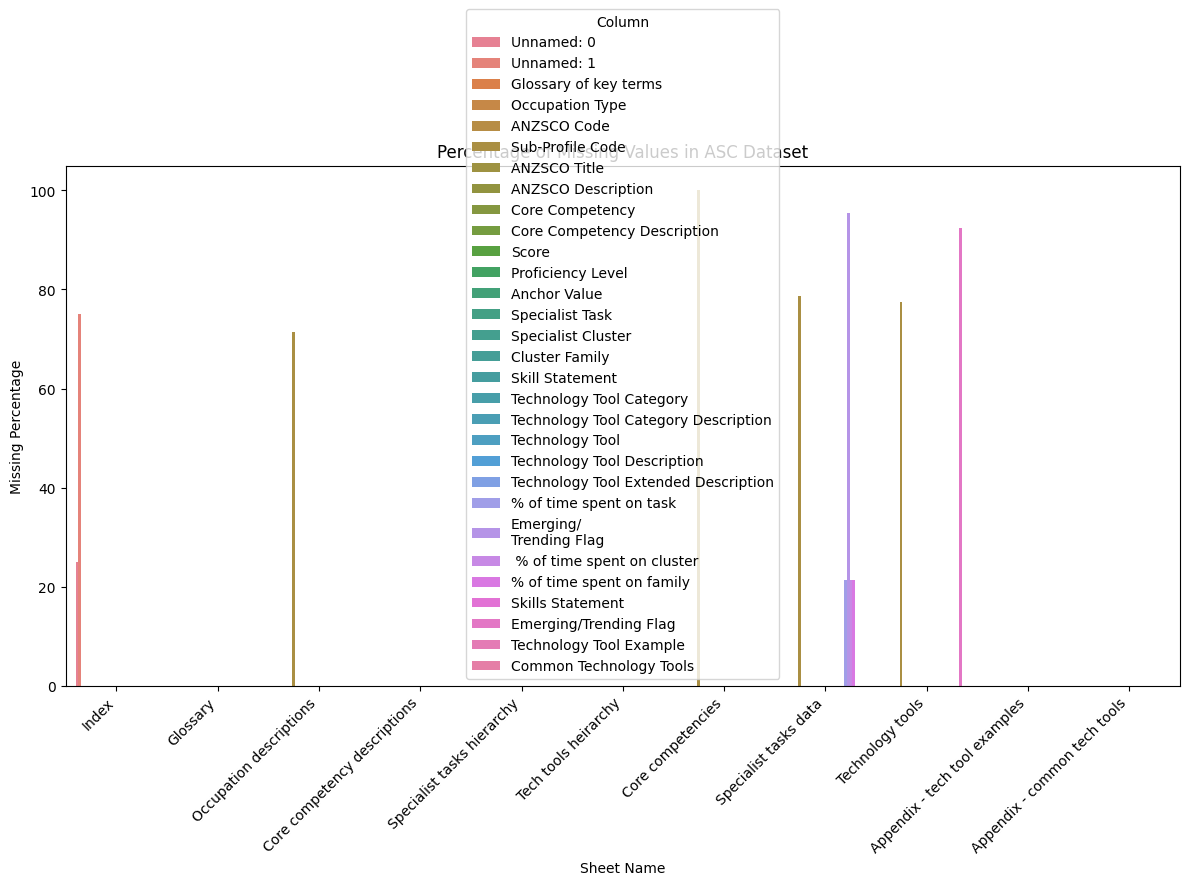

In [ ]:
for sheet_name, df in dfs.items():
    print(f"Missing values in {sheet_name}:")
    print(df.isnull().sum(), "\n")

# Missing value percentages for each sheet and column
missing_data = []
for sheet_name, df in dfs.items():
    for col in df.columns:
        missing_percent = (df[col].isnull().sum() / len(df)) * 100
        missing_data.append([sheet_name, col, missing_percent])

missing_df = pd.DataFrame(missing_data, columns=["Sheet Name", "Column", "Missing Percentage"])

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x="Sheet Name", y="Missing Percentage", hue="Column", data=missing_df)
plt.title("Percentage of Missing Values in ASC Dataset")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Missing Values Identified:**

| Sheet Name               | Column                  | Number of Missing Values |
|--------------------------|-------------------------|----------------|
| Occupation descriptions  | Sub-Profile Code        | 1178           |
| Core competencies        | Sub-Profile Code        | 11030          |
| Specialist tasks data    | Sub-Profile Code        | 23934          |
| Technology tools         | Sub-Profile Code        | 4461           |
| Specialist tasks data    | % of time spent on task | 6516           |
| Specialist tasks data    | % of time spent on cluster | 6516        |
| Specialist tasks data    | % of time spent on family | 6516        |
| Specialist tasks data    | Emerging/Trending Flag  | 29048          |
| Technology tools         | Emerging/Trending Flag  | 5320           |

### 3.3.2 Handing Missing Values

To ensure consistency for data processing, we need to strip whitespace & normalize column names for all DataFrames as a cleansing process before handling the missing values in the dataset.


**Justification for Handling Missing Values:**

- Why Fill "Unknown" for "Sub-Profile Code"?
  - Since it is a classification identifier, replacing it with "Unknown" prevents data loss in "Occupation descriptions," "Core competencies," "Specialist tasks data," and "Technology tools."
- Why Fill "0.0" for Missing Percentages?
  - Time spent columns (%) represent workload distributions, so missing values possibly imply 0% involvement.
- How to Fill the missing values for "Emerging/Trending Flag"?
  - For "Specialist tasks data" and "Technology tools", when existing values are "Trending" in the column "Emerging/Trending Flag", it implies that the missing values are "Emerging" according to the rule of binary classification. Similarly for balance, when existing values are "Emerging", the missing values are assumed to be "Trending".

In [ ]:
for sheet_name, df in dfs.items():
    df.columns = df.columns.str.strip().str.replace("\n", " ").str.replace("\r", " ")
    print(f"Normalized column names in {sheet_name}: {df.columns}")

# 1. Sub-Profile Code: Filling with "Unknown"
occupation_desc["Sub-Profile Code"].fillna("Unknown", inplace=True)
core_comp_data["Sub-Profile Code"].fillna("Unknwon", inplace=True)
specialist_task_data["Sub-Profile Code"].fillna("Unknwon", inplace=True)
tech_tools["Sub-Profile Code"].fillna("Unknwon", inplace=True)

# 2. % of Time Spent on Task/Cluster/Family: Filling missing values with 0.0
specialist_task_data["% of time spent on task"].fillna(0.0, inplace=True)
specialist_task_data["% of time spent on cluster"].fillna(0.0, inplace=True)
specialist_task_data["% of time spent on family"].fillna(0.0, inplace=True)

# 3. Emerging/Trending Flag: Filling missing values based on known data pattern
specialist_task_data["Emerging/ Trending Flag"].fillna("Emerging", inplace=True)
tech_tools["Emerging/Trending Flag"].fillna("Trending", inplace=True)

# Confirming that missing values are handled
print("Missing Values After Handling:")

for sheet_name, df in dfs.items():
    print(f"Missing values in {sheet_name}:")
    print(df.isnull().sum(), "\n")

Normalized column names in Index: Index(['Unnamed: 0', 'Unnamed: 1'], dtype='object')
Normalized column names in Glossary: Index(['Glossary of key terms', 'Unnamed: 1'], dtype='object')
Normalized column names in Occupation descriptions: Index(['Occupation Type', 'ANZSCO Code', 'Sub-Profile Code', 'ANZSCO Title',
       'ANZSCO Description'],
      dtype='object')
Normalized column names in Core competency descriptions: Index(['Core Competency', 'Core Competency Description', 'Score',
       'Proficiency Level', 'Anchor Value'],
      dtype='object')
Normalized column names in Specialist tasks hierarchy: Index(['Specialist Task', 'Specialist Cluster', 'Cluster Family',
       'Skill Statement'],
      dtype='object')
Normalized column names in Tech tools heirarchy: Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description'],
      dtype='object')
Normalized column name

There are no more missing values in the dataset.

## 4. **Text Preprocessing**

Raw text data can be difficult to analyse since it is frequently unstructured and contains stopwords, unusual characters, and errors. In order to ensure correct results in exploratory data analysis, topic modeling, and clustering; text preparation is an essential step in Natural Language Processing (NLP). The following preprocessing pipeline is applied to all text columns in the dataset:

| Step                     | Purpose                                                                              |
|--------------------------|--------------------------------------------------------------------------------------|
| **Convert to Lowercase** | This is to ensure that words like "Task" and "task" are considered the same word.                   |
| **Remove Special Characters** | Removes special characters (@, #, $, %) that do not add any meaning to the text.                 |
| **Remove Numbers**       | Numbers do not usually contribute to semantic meaning in text analysis, hence they are eliminated.               |
| **Remove Extra Spaces**  | Extra Spaces are removed to maintain clean formatting for text processing.                                 |
| **Tokenization**         | This splits sentences into individual words (tokens) for better analysis.                 |
| **Remove Stopwords**     | This removes common words (the, and, is) that do not add much value to the data.                      |
| **Lemmatization**        | This converts words to their base form (running → run, studies → study).                   |


By eliminating noise and ensuring uniformity across all text data, this text preparation step raises the reliability of NLP models. Additionally, it reduces the text size, which improves the efficiency of topic modelling and grouping. Subsequently, to check the appearance of the cleaned data, the first few rows of each processed DataFrame are didisplayed.

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
        return " ".join(tokens)
    return text

import nltk
nltk.download('punkt_tab')

for sheet_name, df in dfs.items():
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].apply(preprocess_text)

# Now `dfs` contains all preprocessed DataFrames

# Verification of Preprocessed data
for sheet_name, df in dfs.items():
    print(f"Sheet: {sheet_name}")
    print(df.head(), "\n")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sheet: Index
                                          Unnamed: 0  \
0                    australian skill classification   
1  version current december updated data may avai...   
2                                              index   
3                                           glossary   
4                             occupation description   

                                          Unnamed: 1  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3                  explanation key term used dataset  
4  anzsco occupation code description sub profile...   

Sheet: Glossary
             Glossary of key terms  \
0                           anzsco   
1  australian skill classification   
2                   cluster family   
3           common technology tool   
4                  core competency   

                                          Unnamed: 1  
0  australian new 

## 5. **Exploratory Data Analysis (EDA)**
Following preprocessing, EDA is carried out to obtain insights into frequently used terms utilising **Word Clouds** and **Word Frequency Analysis**. ***ANZSCO descriptions*** from the **Occupation Descriptions** are analyzed, along with ***Core Competency Description*** from **Core competency descriptions**, which define foundational skills. Next,  Word Frequency Analysis & Word Cloud for ***Anchor Value*** in **Core competencies** are examined as these values define expected competency levels, followed by analyzing ***Skill Statement*** in **Specialist tasks hierarchy** that provides insights into job-specific skills. Afterwards, ***the Specialist Task*** from **Specialist tasks data** are analyzed as it provides insights into occupation-specific skills and activities. Moreover, the **Technology Tool** lists the digital tools and technologies used across different occupation and ***Technology Tool Extended Description*** in **Tech tools heirarchy** provide a detailed explanation of each digital tool. Thus, these analysis helps to understand what tasks are most frequently emphasized.

### 5.1 Word Frequency Analysis and Word Cloud for ANZSCO Description in Occupation Descriptions

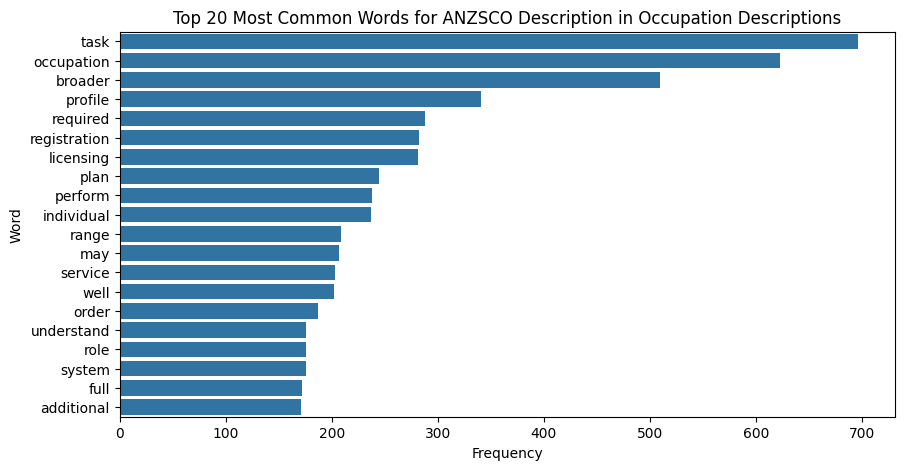

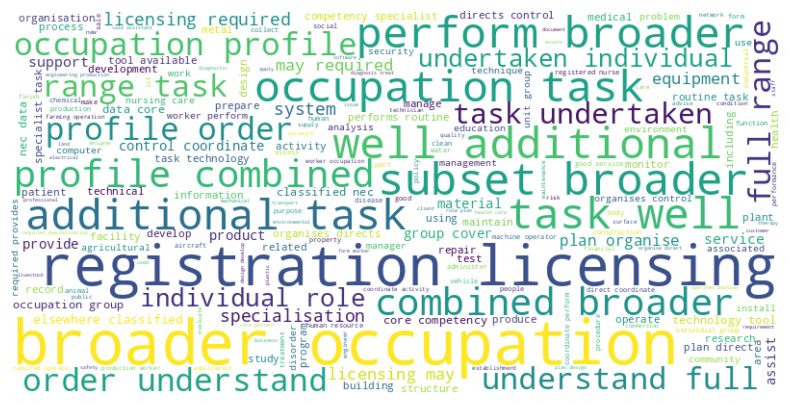

In [ ]:
# Word Frequency Analysis
all_words_occupation_desc = " ".join(occupation_desc["ANZSCO Description"]).split()
word_freq_occupation_desc = Counter(all_words_occupation_desc)
word_freq_df_occupation_desc = pd.DataFrame(word_freq_occupation_desc.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_occupation_desc["Frequency"][:20], y=word_freq_df_occupation_desc["Word"][:20])
plt.title("Top 20 Most Common Words for ANZSCO Description in Occupation Descriptions")
plt.show()

# Word Cloud
all_text_occupation_desc = " ".join(occupation_desc["ANZSCO Description"])
wordcloud_occupation_desc = WordCloud(width=800, height=400, background_color="white").generate(all_text_occupation_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_occupation_desc, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from the Visuals of Word Frequency Analysis and Word Cloud for ANZSCO Description in Occupation Descriptions:**

- The most common words are "task," "occupation," "broader," and "profile."
- This suggests that the classification heavily relies on defining roles and responsibilities rather than emphasizing emerging industry trends.

### 5.2 Word Frequency Analysis and Word Cloud for Core competency descriptions

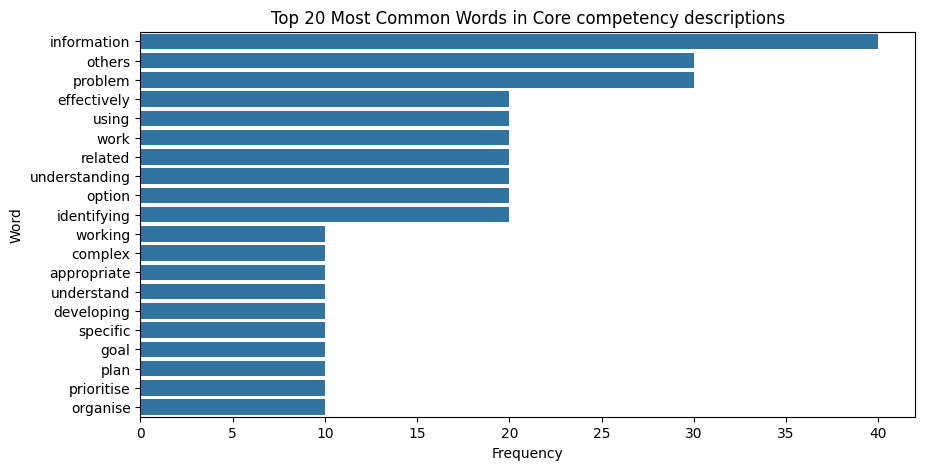

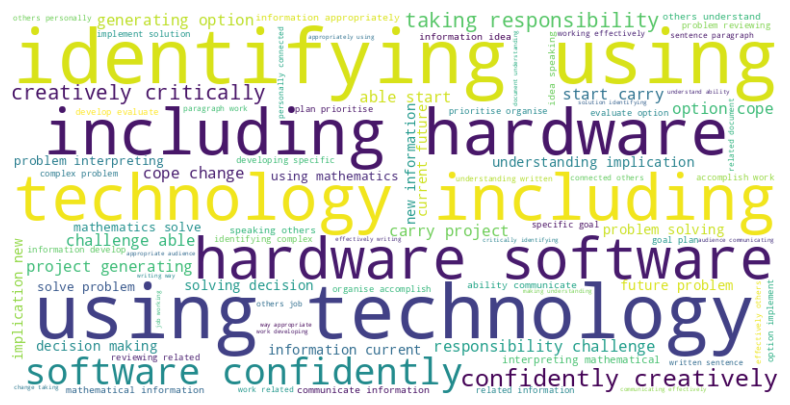

In [ ]:
# Word Frequency Analysis
all_words_core_comp_desc = " ".join(core_comp_desc["Core Competency Description"]).split()
word_freq_core_comp_desc = Counter(all_words_core_comp_desc)
word_freq_df_core_comp_desc = pd.DataFrame(word_freq_core_comp_desc.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_core_comp_desc["Frequency"][:20], y=word_freq_df_core_comp_desc["Word"][:20])
plt.title("Top 20 Most Common Words in Core competency descriptions")
plt.show()

# Word Cloud
all_text_core_comp_desc = " ".join(core_comp_desc["Core Competency Description"])
wordcloud_core_comp_desc = WordCloud(width=800, height=400, background_color="white").generate(all_text_core_comp_desc)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_core_comp_desc, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from the Visuals of Word Frequency Analysis and Word Cloud for Core competency descriptions:**

- Words like "information," "effectively," "problem," and "work" indicate a focus on problem-solving and knowledge-based competencies.
- Limited emphasis on emerging technologies, such as, AI, automation, and cloud computing.

### 5.3 Word Frequency Analysis & Word Cloud for Anchor Value in Core competencies

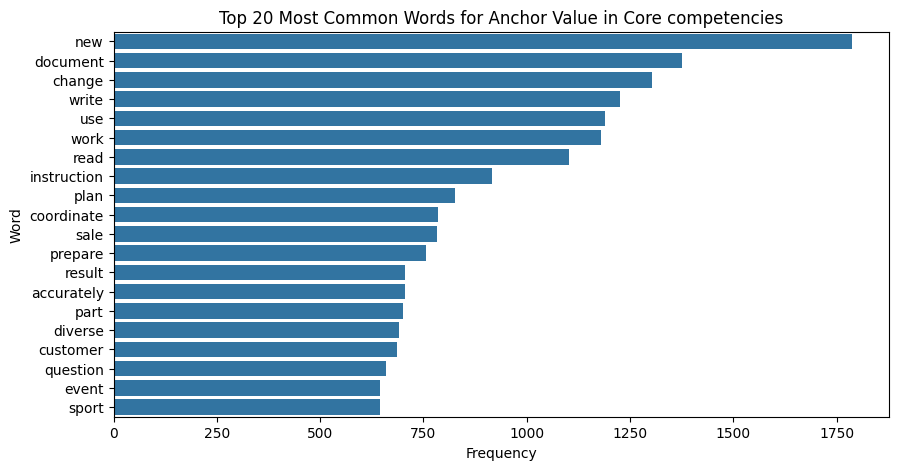

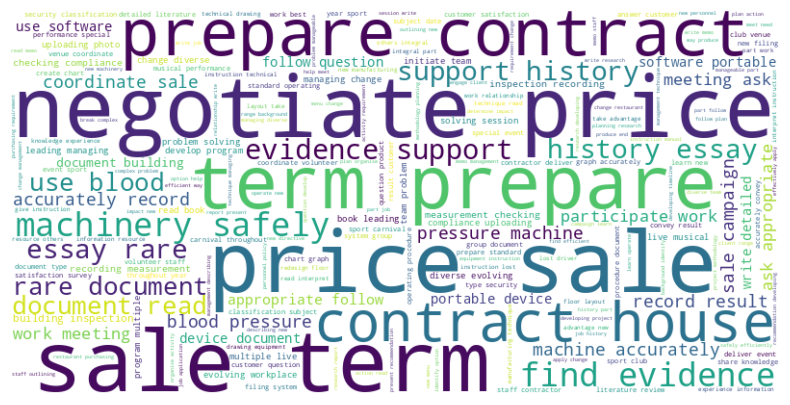

In [ ]:
# Most Common Words for Anchor Value in Core competencies
all_words_core_comp_data = " ".join(core_comp_data["Anchor Value"]).split()
word_freq_core_comp_data = Counter(all_words_core_comp_data)
word_freq_df_core_comp_data = pd.DataFrame(word_freq_core_comp_data.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_core_comp_data["Frequency"][:20], y=word_freq_df_core_comp_data["Word"][:20])
plt.title("Top 20 Most Common Words for Anchor Value in Core competencies")
plt.show()

# Word Cloud
all_text_core_comp_data = " ".join(core_comp_data["Anchor Value"])
wordcloud_core_comp_data = WordCloud(width=800, height=400, background_color="white").generate(all_text_core_comp_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_core_comp_data, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from the Visuals of Word Frequency Analysis & Word Cloud for Anchor Value in Core competencies:**

- Words like "price," "contract," "sale," and "document" suggest an emphasis on business and administrative skills.
- Missing terms related to data science, cybersecurity, and automation, which are essential for modern workforce demands.

### 5.4 Word Frequency Analysis & Word Cloud for Skill Statement in Specialist tasks hierarchy

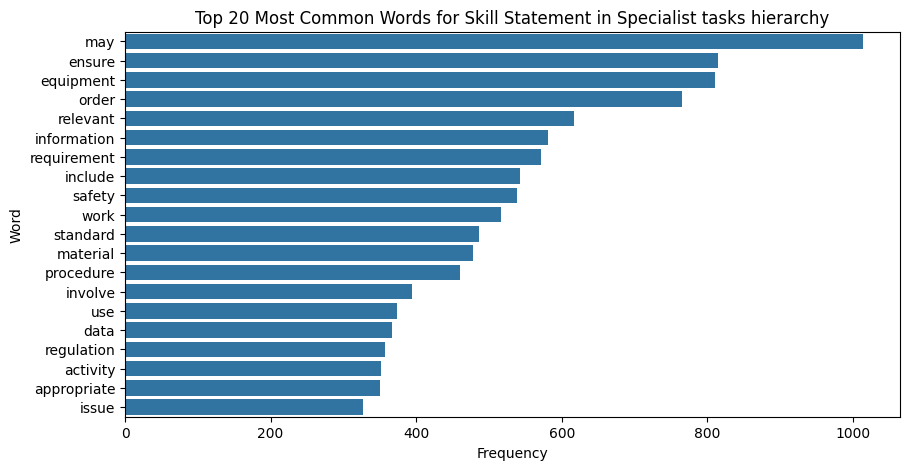

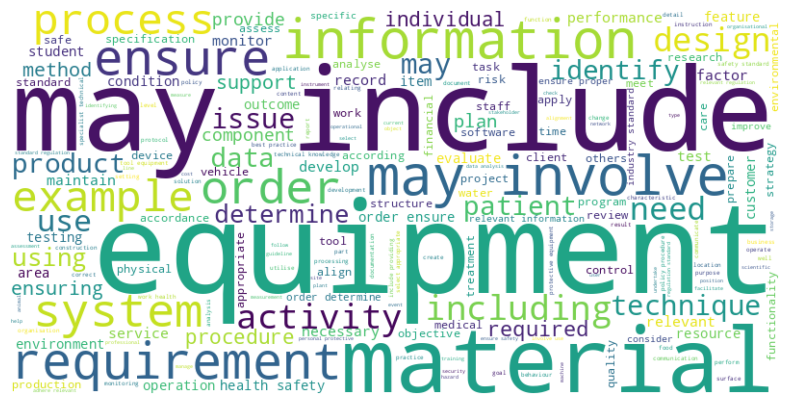

In [ ]:
# Most Common Words for Skill Statement in Specialist tasks hierarchy
all_words_specialist_task_hierarchy = " ".join(specialist_task_hierarchy["Skill Statement"]).split()
word_freq_specialist_task_hierarchy = Counter(all_words_specialist_task_hierarchy)
word_freq_df_specialist_task_hierarchy = pd.DataFrame(word_freq_specialist_task_hierarchy.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_specialist_task_hierarchy["Frequency"][:20], y=word_freq_df_specialist_task_hierarchy["Word"][:20])
plt.title("Top 20 Most Common Words for Skill Statement in Specialist tasks hierarchy")
plt.show()

# Word Cloud
all_text_specialist_task_hierarchy = " ".join(specialist_task_hierarchy["Skill Statement"])
wordcloud_specialist_task_hierarchy = WordCloud(width=800, height=400, background_color="white").generate(all_text_specialist_task_hierarchy)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_specialist_task_hierarchy, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from Visuals of Word Frequency Analysis & Word Cloud for Skill Statements in Specialist tasks hierarchy:**
- Words like "equipment," "procedure," "order," "information," and "regulation" highlight technical and compliance-related tasks.
- A possible gap in digital transformation is indicated by the absence of specialised duties relating to digital or AI.

### 5.5 Word Frequency Analysis & Word Cloud for Specialist tasks data

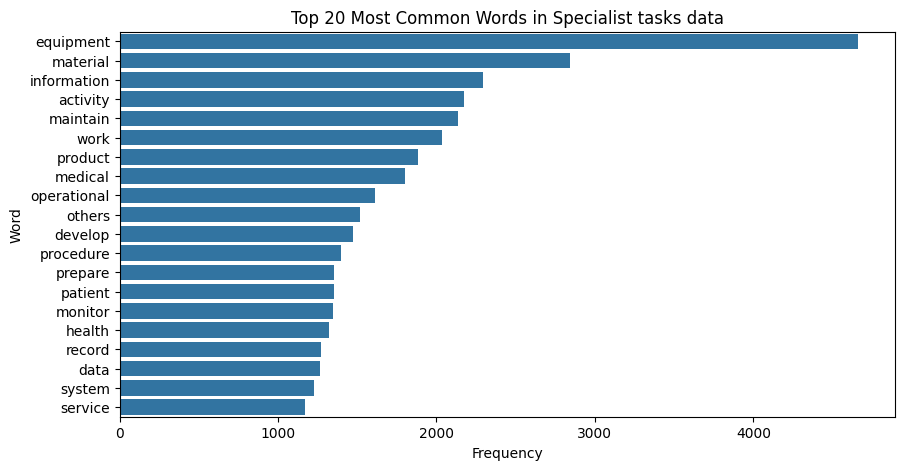

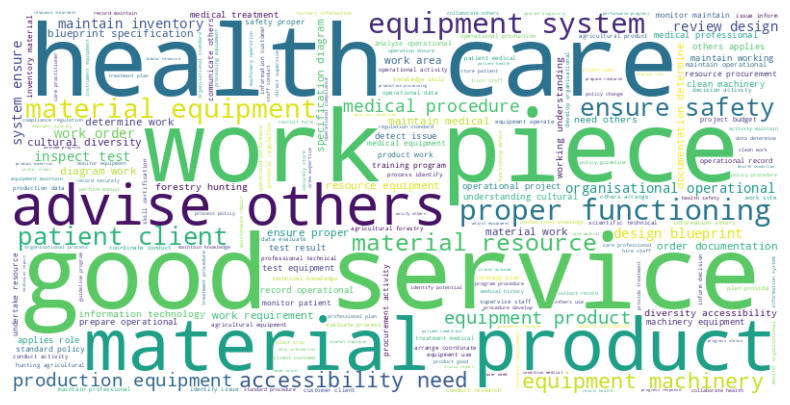

In [ ]:
# Most Common Words in Specialist tasks data
all_words_specialist_task_data = " ".join(specialist_task_data["Specialist Task"]).split()
word_freq_specialist_task_data = Counter(all_words_specialist_task_data)
word_freq_df_specialist_task_data = pd.DataFrame(word_freq_specialist_task_data.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_specialist_task_data["Frequency"][:20], y=word_freq_df_specialist_task_data["Word"][:20])
plt.title("Top 20 Most Common Words in Specialist tasks data")
plt.show()

# Word Cloud
all_text_specialist_task_data = " ".join(specialist_task_data["Specialist Task"])
wordcloud_specialist_task_data = WordCloud(width=800, height=400, background_color="white").generate(all_text_specialist_task_data)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_specialist_task_data, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from Visuals of Word Frequency Analysis & Word Cloud for Specialist tasks data:**

- The most frequently occurring words include "equipment," "material," "information," "procedure," and "monitor."
- The word cloud further emphasizes terms like "health," "service," "good," "patient," and "safety."
- The classification of specialist tasks is highly focused on equipment management, health services, and procedures rather than on data-driven or emerging digital skills.

### 5.6 Word Frequency Analysis & Word Cloud Technology Tool Extended Descriptions in Tech tools heirarchy

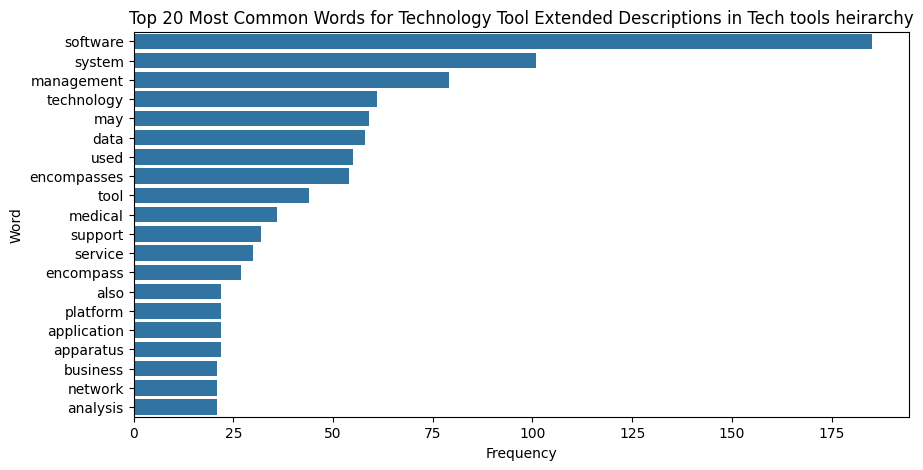

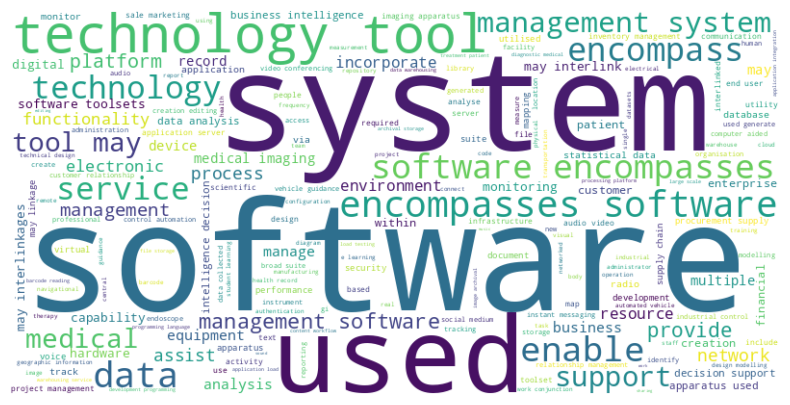

In [ ]:
# Most Common Words for Technology Tool Extended Descriptions in Tech tools heirarchy
all_words_tech_tools_hierarchy = " ".join(tech_tools_hierarchy["Technology Tool Extended Description"]).split()
word_freq_tech_tools_hierarchy = Counter(all_words_tech_tools_hierarchy)
word_freq_df_tech_tools_hierarchy = pd.DataFrame(word_freq_tech_tools_hierarchy.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_tech_tools_hierarchy["Frequency"][:20], y=word_freq_df_tech_tools_hierarchy["Word"][:20])
plt.title("Top 20 Most Common Words for Technology Tool Extended Descriptions in Tech tools heirarchy")
plt.show()

# Word Cloud
all_text_tech_tools_hierarchy = " ".join(tech_tools_hierarchy["Technology Tool Extended Description"])
wordcloud_tech_tools_hierarchy = WordCloud(width=800, height=400, background_color="white").generate(all_text_tech_tools_hierarchy)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tech_tools_hierarchy, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from the Visuals of Word Frequency Analysis & Word Cloud Technology Tool Extended Descriptions in Tech tools heirarchy:**

- The most common words include "software," "system," "management," "technology."
- The word cloud highlights terms such as "system," "software," "technology," "tool."
- The focus on management software and techonology systems suggests that digital literacy is critical, but AI, automation, and data science tools are not significantly represented.

### 5.7 Word Frequency Analysis & Word Cloud for Technology tools

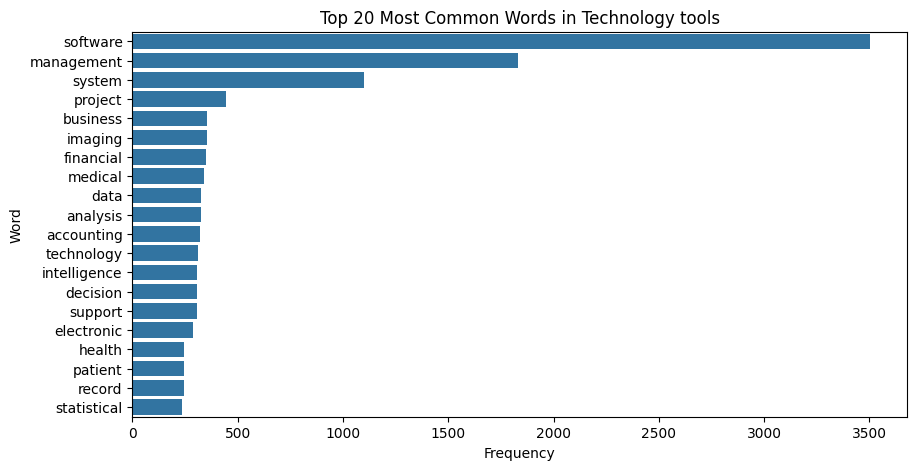

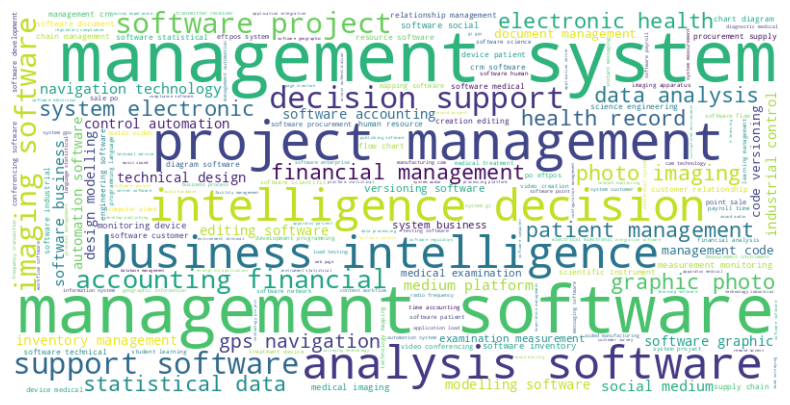

In [ ]:
# Most Common Words in Technology tools
all_words_tech_tools = " ".join(tech_tools["Technology Tool"]).split()
word_freq_tech_tools = Counter(all_words_tech_tools)
word_freq_df_tech_tools = pd.DataFrame(word_freq_tech_tools.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df_tech_tools["Frequency"][:20], y=word_freq_df_tech_tools["Word"][:20])
plt.title("Top 20 Most Common Words in Technology tools")
plt.show()

# Word Cloud
all_text_tech_tools = " ".join(tech_tools["Technology Tool"])
wordcloud_tech_tools = WordCloud(width=800, height=400, background_color="white").generate(all_text_tech_tools)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tech_tools, interpolation="bilinear")
plt.axis("off")
plt.show()

**Observations from the Visuals of Word Frequency Analysis & Word Cloud for Technology tools:**
- The most frequently mentioned words include "software," "management," "system," "technology," and "project."
- The word cloud highlights terms such as "management," "software," "intelligence," "project," and "decision."
- The classification appears to be dominated by software and digital systems, according to this analysis, but cloud computing, artificial intelligence, and cybersecurity - all of which are essential for the workforce of the future - are not given much attention.

**Summary of Word Frequency Analysis & Word Cloud Insights:**

- Rather than digital transformation, core competencies concentrate on generic problem-solving.
- Technology tools are mainly management-oriented (e.g., project and financial management) rather than AI or automation-based.
- ANZSCO descriptions place a greater emphasis on classification than on emerging technologies.
- Specialist tasks place a greater emphasis on operational and healthcare-related activities with less emphasis on digital transformation.
- Technology tool descriptions reinforce the dominance of traditional IT systems but make no mention of cutting-edge technologies like blockchain and artificial intelligence.

This methodical examination facilitates the development of ideas for enhancing ASC to meet the needs of the modern workforce.

## 5.8 Bigrams and Bigram Network Graph Analysis

Word pairings that commonly occur together in text are known as bigrams. Bigram analysis is essential to text analysis due to:

- Contextual Understanding: Word pairs provide context, while single words may not be sufficient to provide meaning.
- Finding Important Relationships: Word pairings that appear frequently in the dataset draw attention to significant ideas.
- Improving NLP Frameworks: Bigrams are helpful in applications involving predictive text, grouping, and topic modelling.
- Improved Text Representation: Recognising structured sentences and domain-specific terminology is made easier by knowing common bigrams.

These common word pairs are represented visually by a Bigram Network Graph, where:

- Nodes stand for words.
- Words that commonly occur together are connected by edges.
- The word pair's frequency is indicated by the edge thickness.

`NLTK` is used to generate word pairs. The frequency of each bigram is counted, followed by an initialization of a network graph. As edges between nodes, the most frequent bigrams (top n=50) are included. For visualisation, edge widths are then normalised. Bigram frequency is represented by edge width, and data are normalised to maintain edge widths between 1 and 6 such that variations are easily observable. Then, the network graph is plotted to determine node positioning and Nodes (words) and Edges (connections) are drawn with labels. Network graphs are generated for:

- ANZSCO Descriptions
- Core Competency Descriptions
- Anchor Values in Core Competencies
- Skill Statement in Specialist Task Hierarchy
- Specialist Task Data
- Technology Tool Extended Descriptions
- Technology Tools

Why is Bigrams Limited to 50?
- Steer clear of overcrowding: A graph with too many links is unreadable.
- Emphasise Important Phrases: To keep insights focused, just the most common bigrams are displayed.
- Performance Efficiency: It takes a lot of computing power to render big graphs.


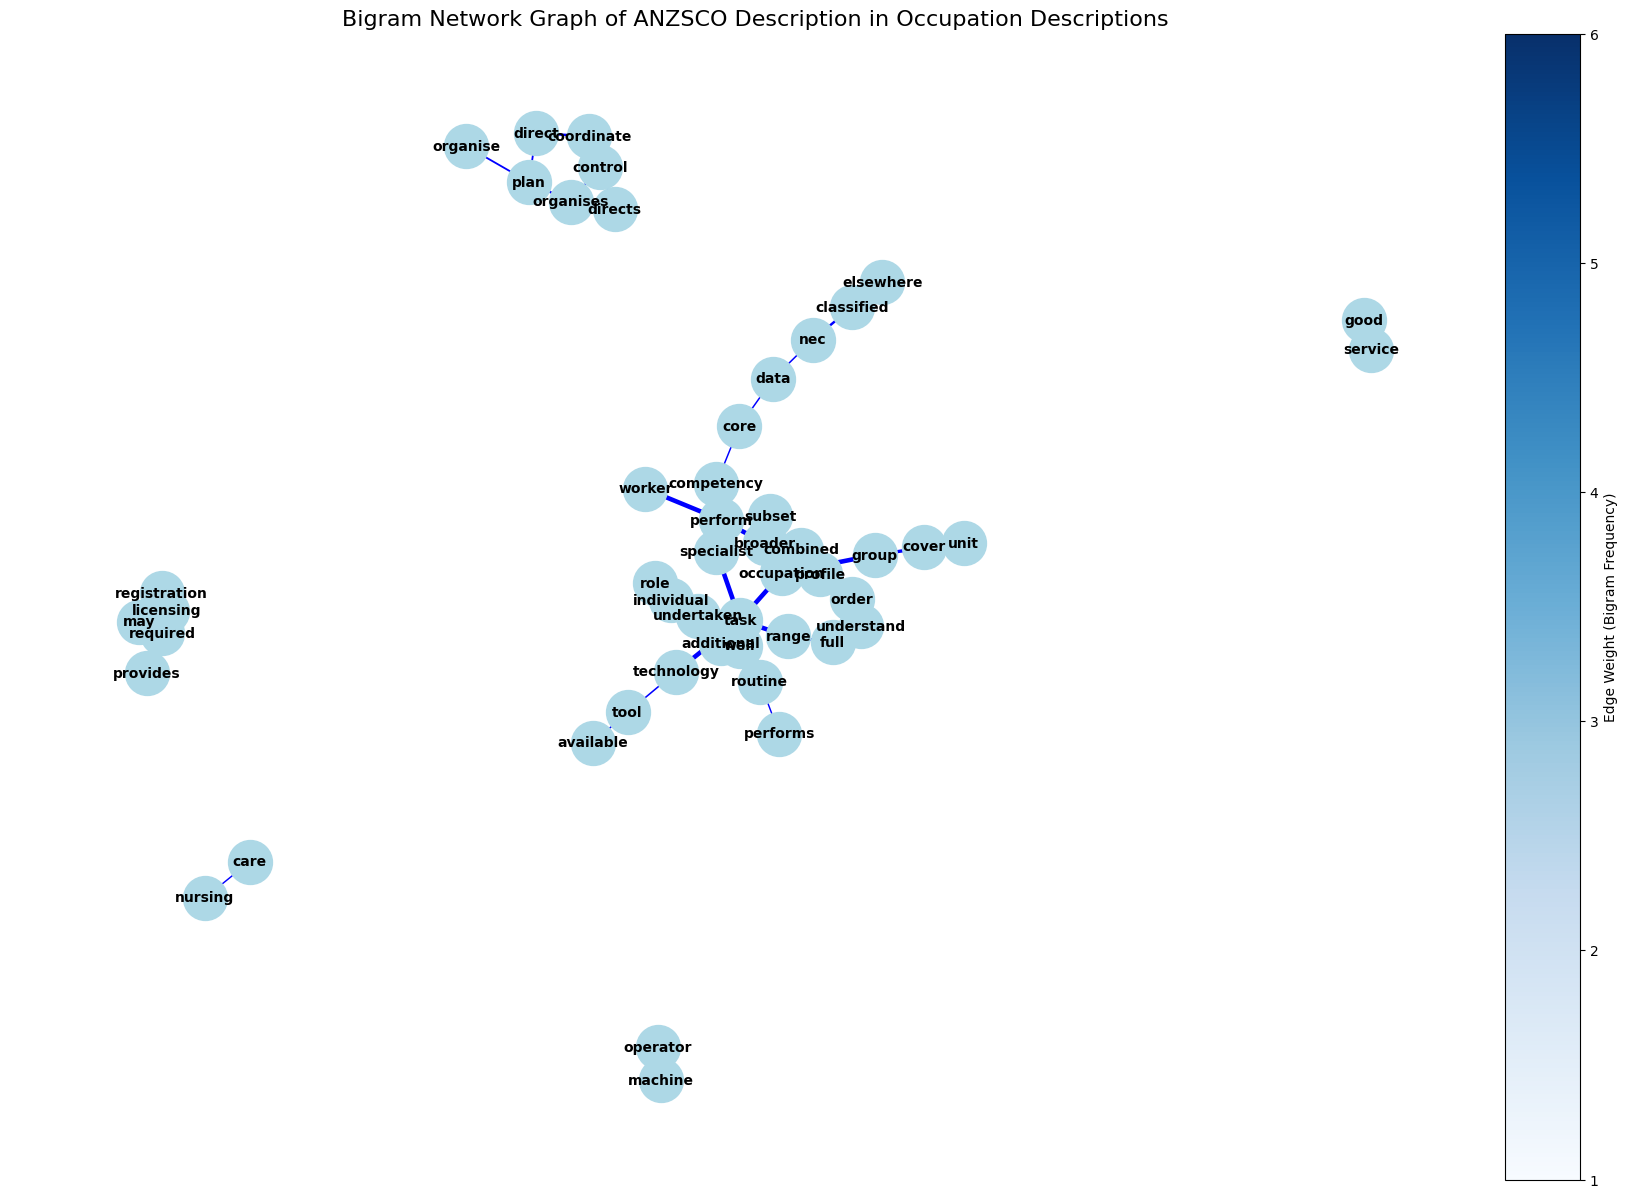

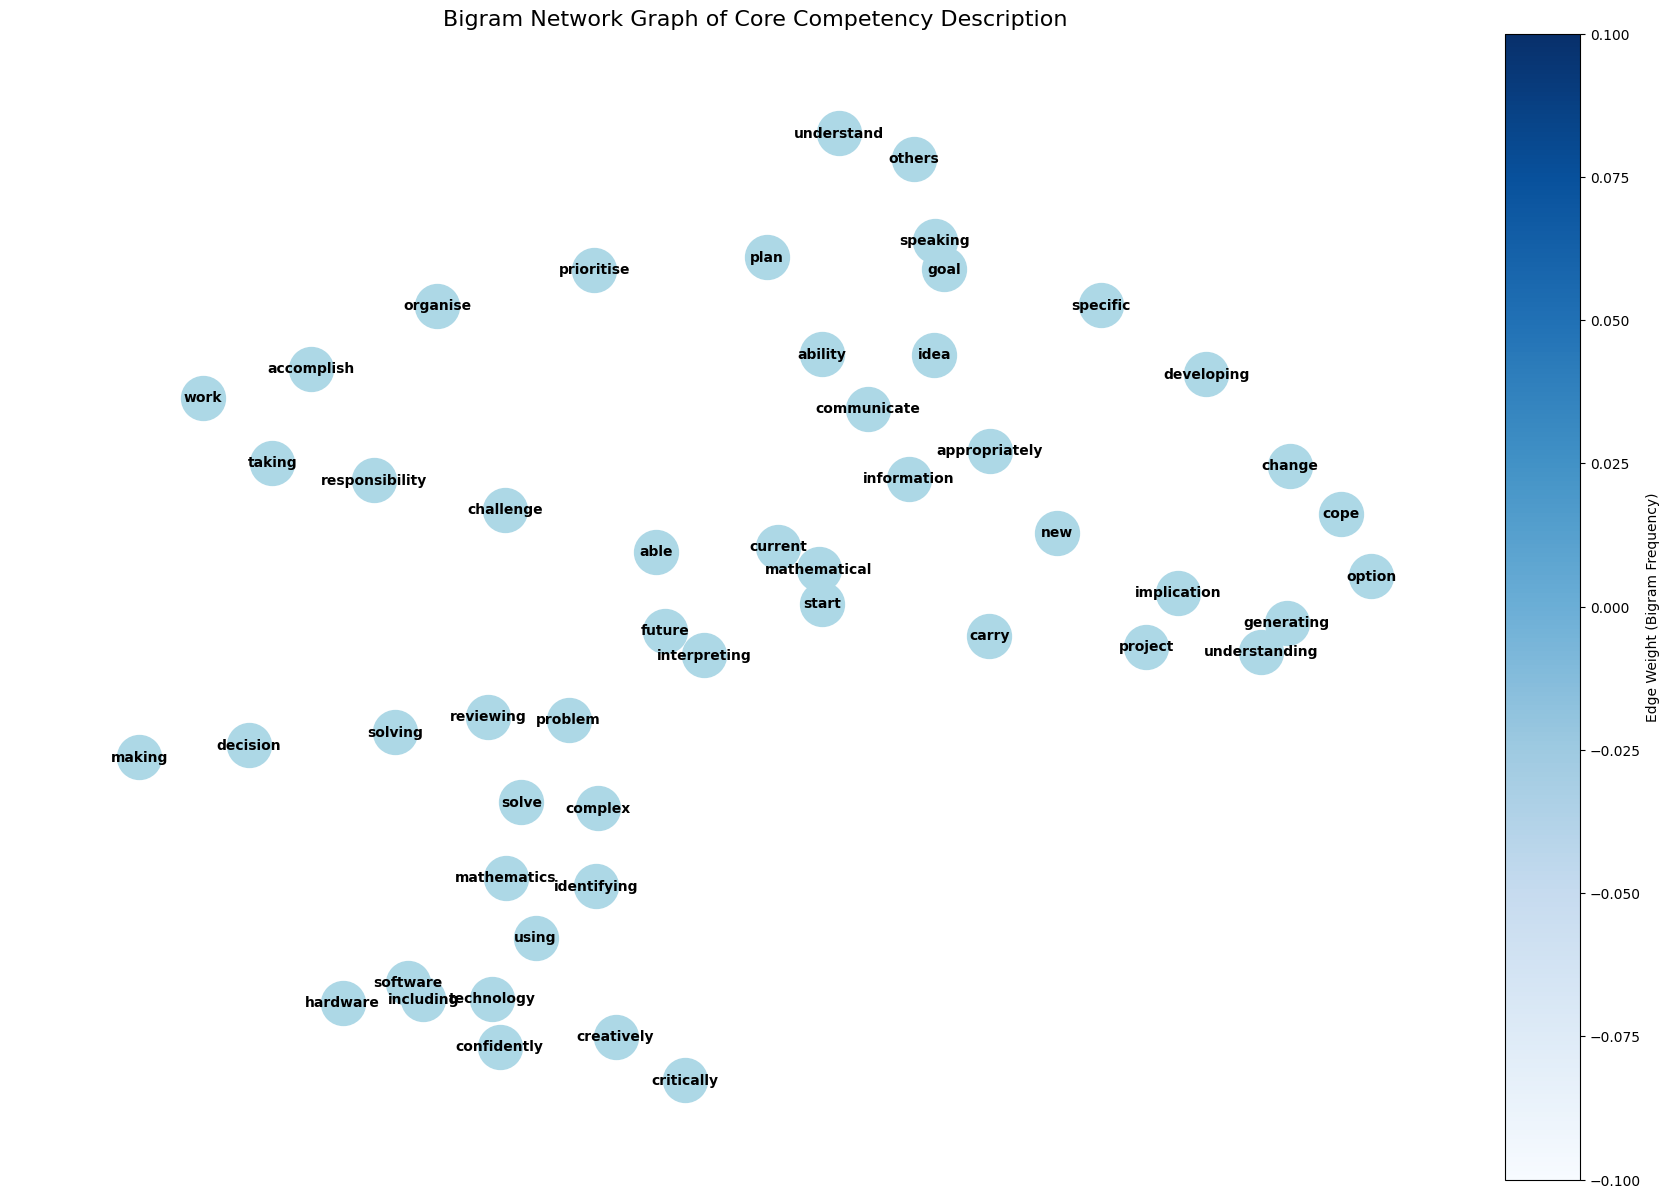

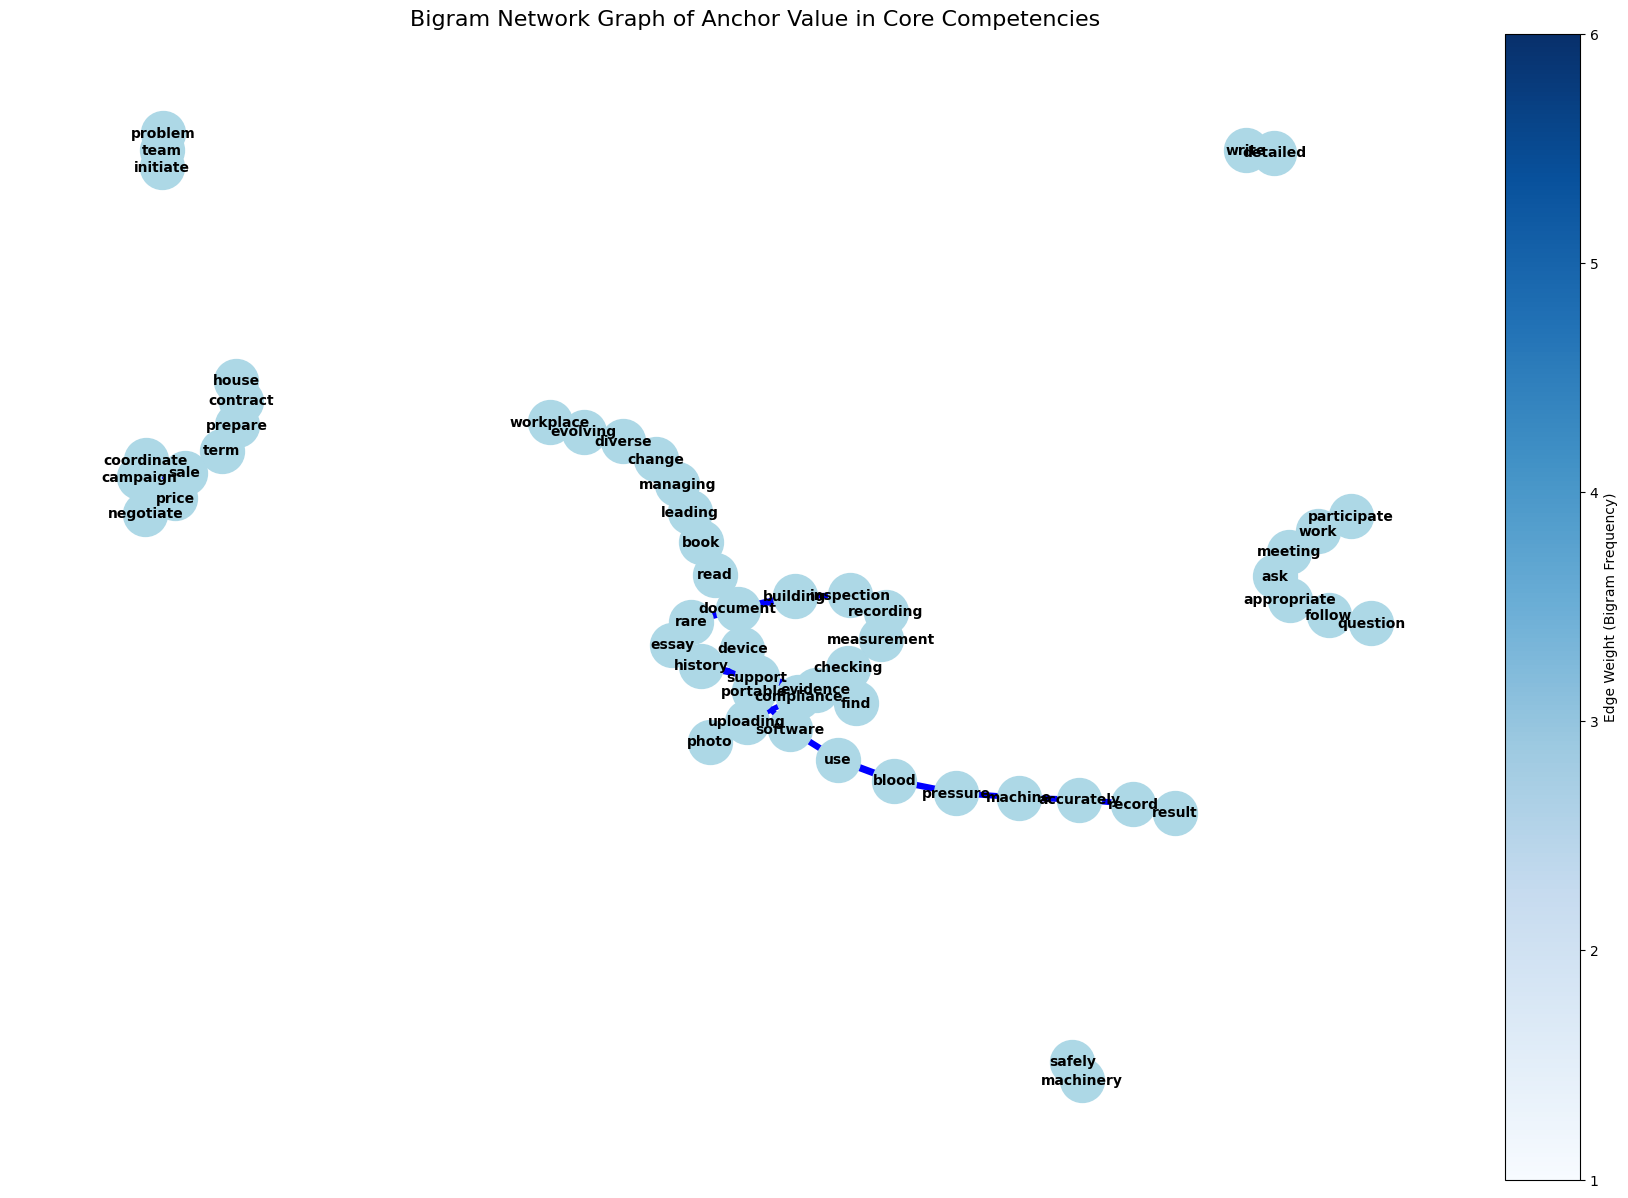

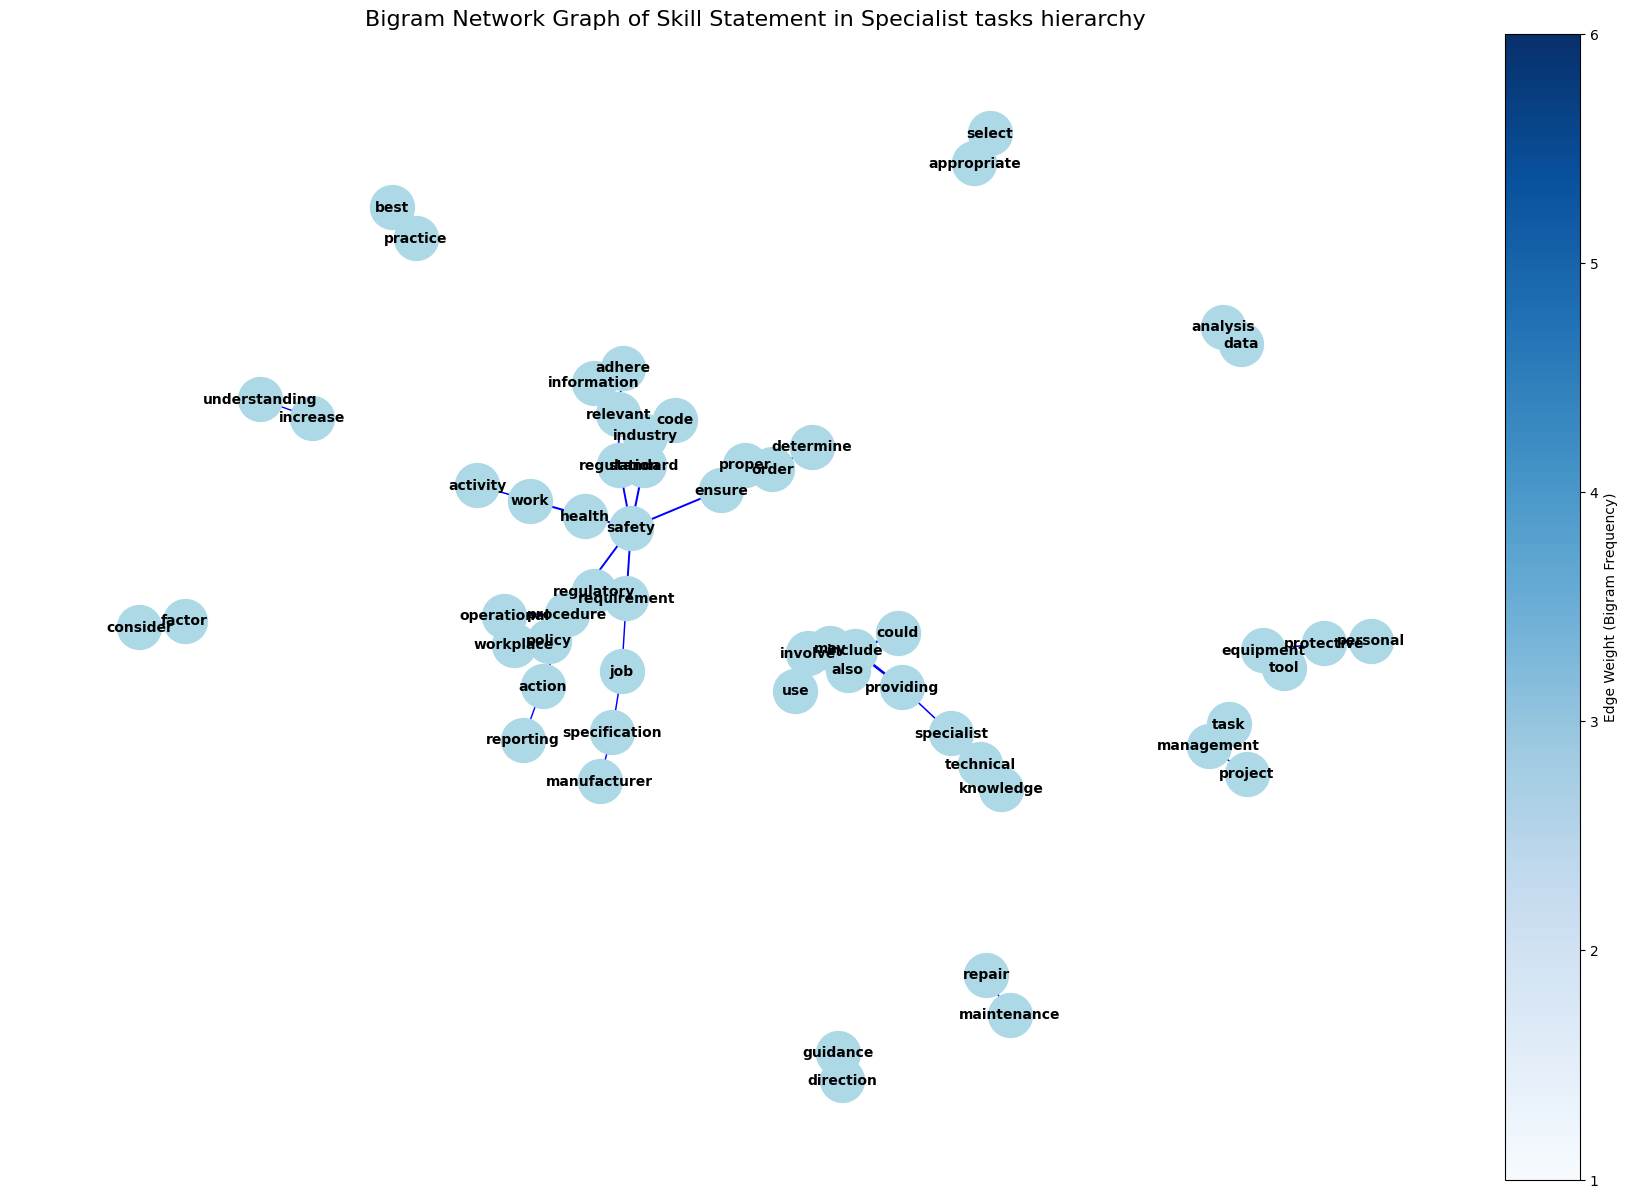

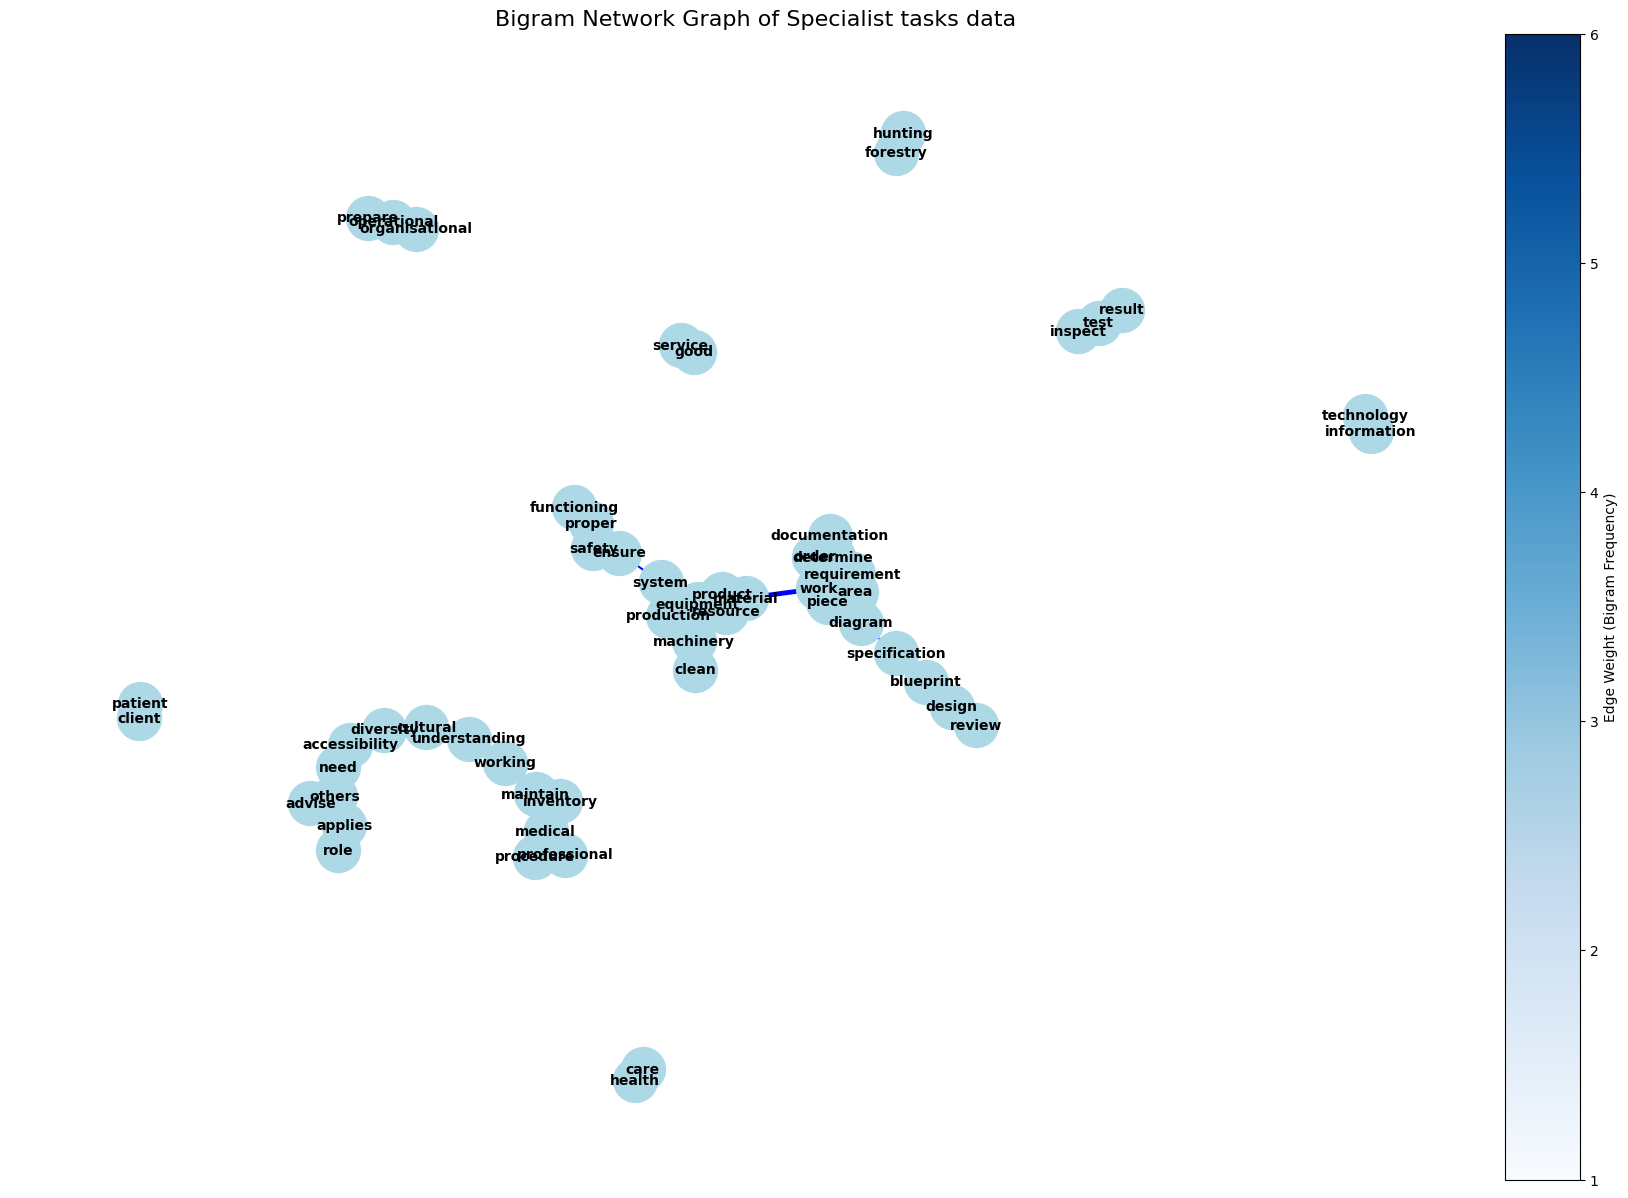

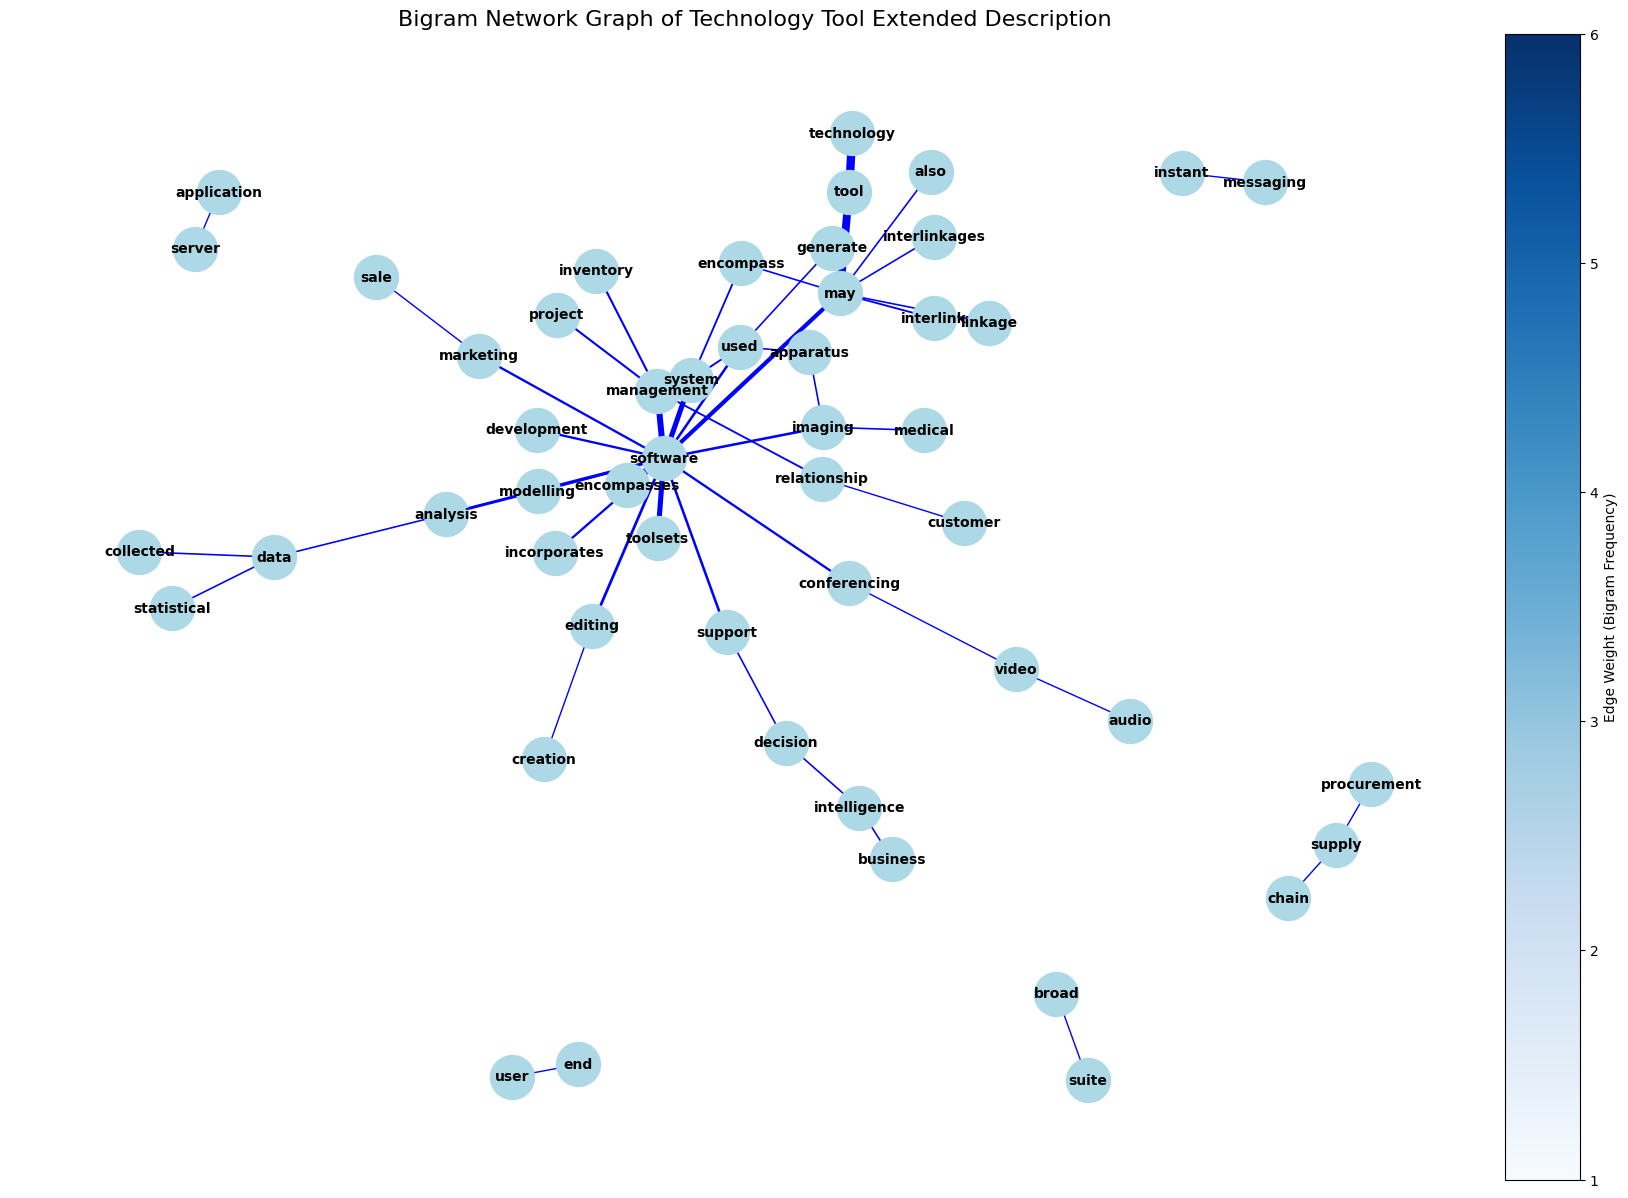

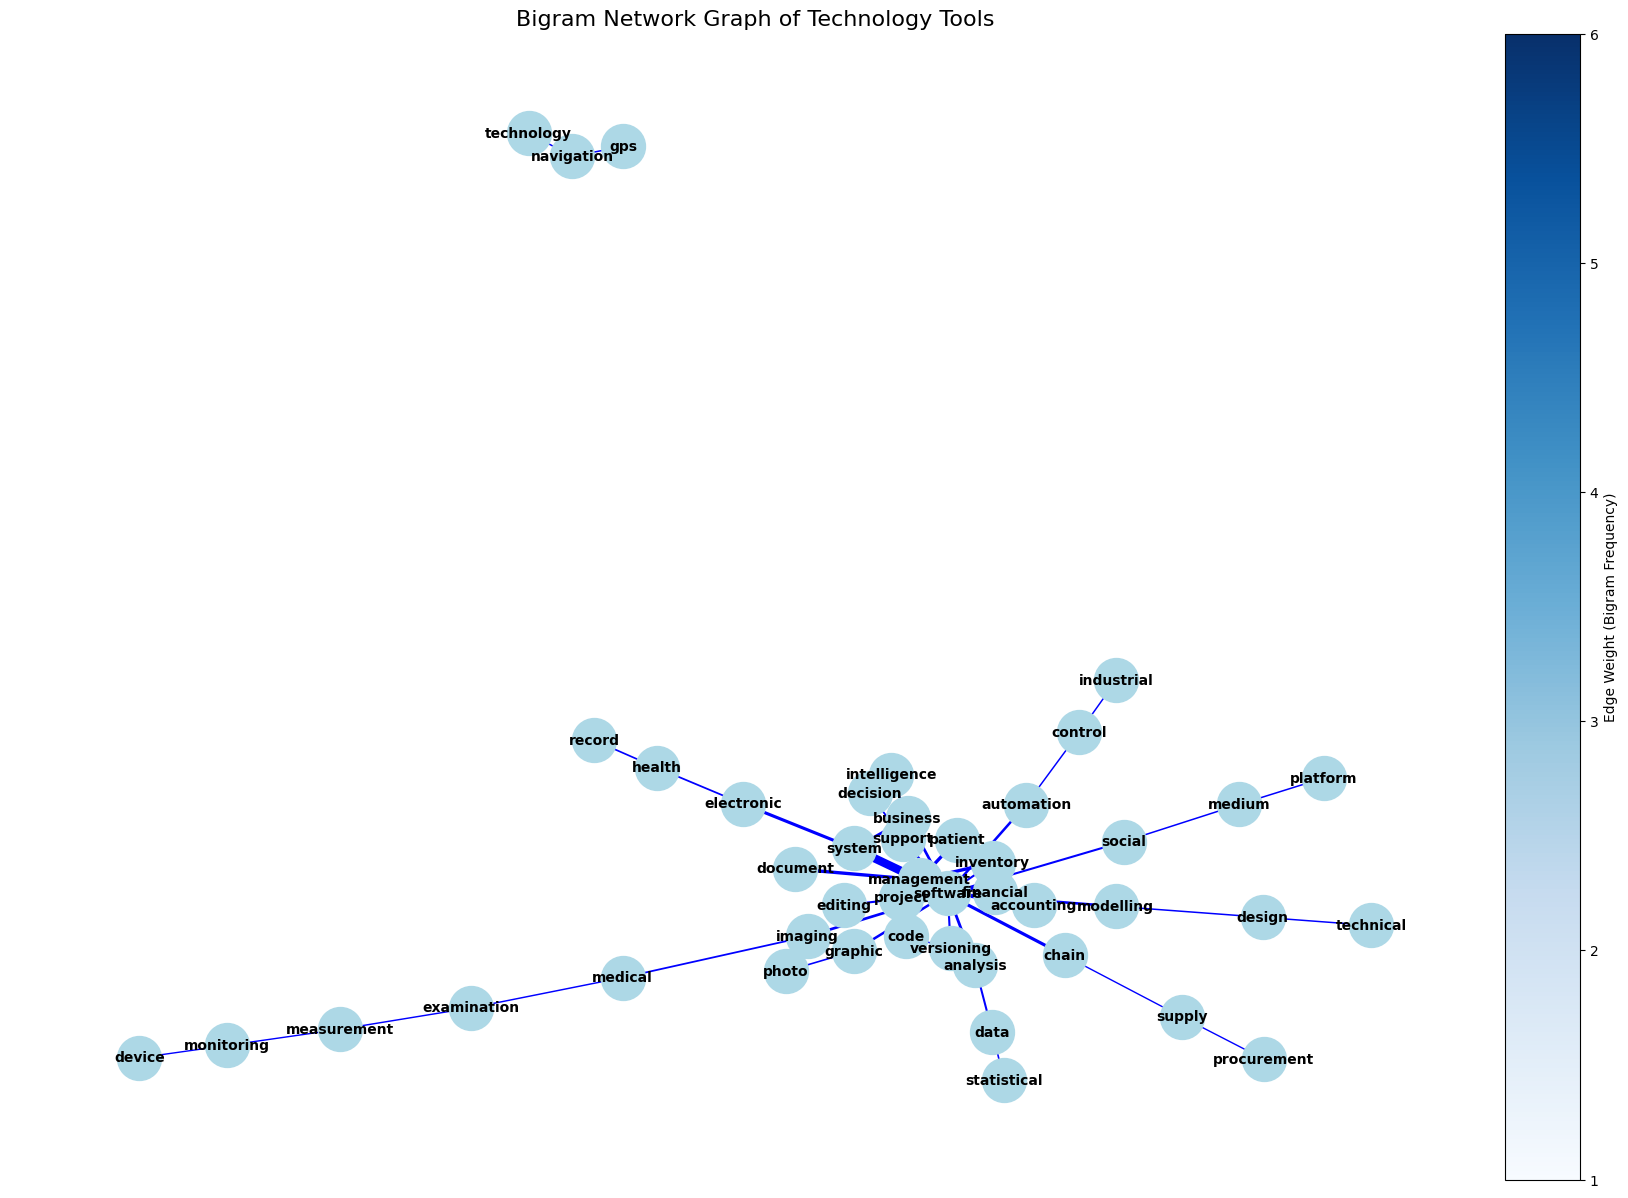

In [ ]:
def plot_bigram_network(tokens, name, n=50):

    bi_grams = list(bigrams(tokens))

    bigram_freq = Counter(bi_grams)

    G = nx.Graph()

    edge_width = []
    edge_color = []

    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append('b')

    edge_width = np.array(edge_width)
    edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())

    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)

    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)

    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    plt.title(f'Bigram Network Graph of {name}', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_width), vmax=max(edge_width)))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cax)
    cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)
    plt.show()

plot_bigram_network(all_text_occupation_desc.split(), "ANZSCO Description in Occupation Descriptions")
print("\n")
plot_bigram_network(all_text_core_comp_desc.split(), "Core Competency Description")
print("\n")
plot_bigram_network(all_text_core_comp_data.split(), "Anchor Value in Core Competencies")
print("\n")
plot_bigram_network(all_text_specialist_task_hierarchy.split(), "Skill Statement in Specialist tasks hierarchy")
print("\n")
plot_bigram_network(all_text_specialist_task_data.split(), "Specialist tasks data")
print("\n")
plot_bigram_network(all_text_tech_tools_hierarchy.split(), "Technology Tool Extended Description")
print("\n")
plot_bigram_network(all_text_tech_tools.split(), "Technology Tools")

**Analysis of Results from the Images:**

1. Bigram Network of ANZSCO Description in Occupation Descriptions:
  - demonstrates the connections between necessary tasks and occupational functions.
  - Key terms: "perform worker," "technology tool," "specialist competency."
2. Bigram Network of Core Competencies
  - Highlights critical abilities for various roles.
3. Bigram Network of Anchor Values in Core Competencies:
  - Exemplifies skills like "blood pressure," "machine accurately," and "essay history evidence."
4. Bigram Network of Skill Statement in Specialist tasks hierarchy:
  - Demonstrates the connections between rules and work procedures.
  - Terms that are frequently used include "requirement regulatory," "health work," and "regulation standard."
5. Bigram Network of Specialist Tasks Data:
  - Identifies often needed duties, such as "maintain equipment," "machinery prodcution," and "ensure safety."
6. Bigram Network of Technology Tool Extended Descriptions
  - Highlights significant applications and software tools.
  - Similar terms include "software management," "software system," and "software development."
7. Bigram Network of Technology Tools Network
  - Focusses on essential technology used in a variety of professions.
  - Highlights include "software project," "management system," along with "management system."


**Key Takeaways:**

- **Technology and Digital Skills:** A lot of bigrams stress the value of analytical tools and software.
- **Workplace Safety and Compliance:** The use of terms like "safety standard" and "regulation adherence" indicates that compliance is a top priority.
- **Specialist Duties and Responsibilities:** Recurring links between roles and competencies demonstrate the organisational structure of many occupations.
- **Skills related to business and project management:** Terms like "management system," "software project," and "software development" are commonly used, demonstrating their applicability in contemporary professions.


The job tasks, necessary skills, and technological tools in the dataset are better understood due to this analysis of bigrams and network graphs. By graphically recognising links that are not immediately obvious through word frequency alone, it improves the overall text analysis.

## 6. **Topic Modeling with LDA**

One popular method for identifying hidden topics in a big text collection is **Latent Dirichlet Allocation (LDA)**. In addition to summarising and organising unstructured material to facilitate interpretation, it assists in locating important themes in huge text collections without the need for manual reading. Additionally, by classifying documents according to subjects found, it enhances search and retrieval. By combining related content, it helps to improve recommendation algorithms. Our dataset's overall structure and patterns can be better understood by employing LDA to extract relevant topics from it.

The data listed below were selected for topic modeling as these are rational for topic modeling and contain a lot of textual information:

- **ANZSCO Description from Occupation Descriptions:** Offers descriptions of many professions with recurring topics.
- **Descriptions of Core Competencies:** Provides information on necessary skills and proficiencies.
- **Skill Statements from Specialist tasks hierarchy and Specialist tasks data:** Specialised tasks are contained in the Specialist Task Hierarchy & Data.
- **Technology Tool Extended Description and Technology Tool from Tech tools heirarchy and Technology tools respectively:** Descriptions of technological tools and their uses are included in Technology Tools & Hierarchy.

The script extracts text data from different data sources (Occupation descriptions, Core competency descriptions, etc.) and stores them in a list by ensuring that no missing values (NaN) are included. The data is then preprocessed by converting raw text into lowercase and removes punctuation using `simple_preprocess()` `Tokenization`, followed by `Bigram` (Bigrams are common word pairs (e.g., "data analysis")) & `Trigram` (Trigrams are sequences of three words (e.g., "business intelligence software")) Modeling. The model is trained on the dataset, and phrases are detected using `Phrases()` and `Phraser()`. In order to convert the Text data into numerical format `Dictionary` is used to create a vocabulary of unique words from the dataset for each  document to be represented as a list of word counts, known as **Bag-of-Words Representation**. To make sure the model converges to relevant subjects, the LDA model is trained to extract five distinct topics over the course of ten passes during the training phase. The most crucial terms for every issue are then taken out. Finally, the `gensimvis.prepare()` function generates an interactive visualisation that displays the top terms for each subject, indicating which words contribute most to each topic, as well as the distance across topics **(Intertopic Distance Map)**.

In [ ]:
text_data = []

text_data.extend(dfs["Occupation descriptions"]["ANZSCO Description"].dropna().tolist())
text_data.extend(dfs["Core competency descriptions"]["Core Competency Description"].dropna().tolist())
text_data.extend(dfs["Specialist tasks hierarchy"]["Skill Statement"].dropna().tolist())
text_data.extend(dfs["Specialist tasks data"]["Skills Statement"].dropna().tolist())
text_data.extend(dfs["Tech tools heirarchy"]["Technology Tool Extended Description"].dropna().tolist())
text_data.extend(dfs["Technology tools"]["Technology Tool"].dropna().tolist())

print(f"Total documents for topic modeling: {len(text_data)}")


# Preprocess the Text for LDA
def tokenize(text):
    return simple_preprocess(text, deacc=True)

tokenized_texts = [tokenize(doc) for doc in text_data]

# Bigram and trigram models
bigram = Phrases(tokenized_texts, min_count=5, threshold=10)
trigram = Phrases(bigram[tokenized_texts], threshold=10)
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

texts_bigrams = [bigram_mod[doc] for doc in tokenized_texts]
texts_trigrams = [trigram_mod[bigram_mod[doc]] for doc in texts_bigrams]

# Text to Bag-of-Words & TF-IDF
id2word = Dictionary(texts_trigrams)

# Convert to bag-of-words format (word frequencies)
corpus = [id2word.doc2bow(text) for text in texts_trigrams]

# An example (word_id, word_count) for first document
print(corpus[:1])

num_topics = 5

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    passes=10,
    random_state=42
)

# Printing discovered topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx+1}: {topic}")

# Visualize Topics with pyLDAvis
lda_vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_vis)

Total documents for topic modeling: 39741
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]]
Topic 1: 0.023*"information" + 0.022*"relevant" + 0.020*"may" + 0.020*"ensure" + 0.018*"equipment" + 0.018*"standard" + 0.018*"patient" + 0.017*"record" + 0.016*"health" + 0.014*"medical"
Topic 2: 0.026*"may" + 0.016*"include" + 0.014*"relevant" + 0.013*"service" + 0.011*"information" + 0.011*"involve" + 0.011*"inventory" + 0.010*"gps_navigation_technology" + 0.010*"condition" + 0.009*"need"
Topic 3: 0.024*"may" + 0.022*"ensure" + 0.022*"work" + 0.020*"activity" + 0.016*"safety" + 0.015*"relevant" + 0.015*"task" + 0.014*"include" + 0.014*"standard" + 0.013*"staff"
Topic 4: 0.105*"software" + 0.035*"management" + 0.031*"data" + 0.018*"analysis" + 0.015*"project" + 0.014*"support" + 0.013*"information" + 0.013*"may" + 0.012*"decision" + 0.011*"system"
Topic 5: 0.039*"equipment" + 0.030

**Analysis of the Output Results:**

1. **Total Documents for Topic Modeling**:
  - 39,741 documents make up the dataset, which is a sizable corpus for efficient topic extraction.
2. **Extracted Topics and Their Key Terms:**


| Topic   | Top Words                                      | Interpretation                                      |
|---------|------------------------------------------------|-----------------------------------------------------|
| **Topic 1** | equipment, material, requirement, safety, specification | Likely about engineering and industrial requirements. |
| **Topic 2** | information, relevant, ensure, equipment, health, medical | Likely related to healthcare and medical regulations.            |
| **Topic 3** | may, ensure, work, activity, safety, task, standard | Related to workplace safety and compliance.            |
| **Topic 4** | software, management, data, analysis, project, support | Focused on business intelligence and data management.   |
| **Topic 5** | may, service, information, involve, inventory, gps_navigation_technology | Likely related to technology and services.   |


3. **Visualization Insights**:
  - Topics 2, 3 and 5 have some overlap, indicating similar themes, according to the Intertopic Distance Map.
  - Words like software, management, data, and equipment are common across a variety of topics, as seen by the Top-30 Most Salient Terms.
  - The distribution of key phrases for each subject (topic 1-5) aids in our comprehension of the many themes present in the dataset.


The dataset, which consists of 39,741 documents, is extensive and sizable, enabling LDA to detect significant themes and patterns without overfitting Meaningful themes have been effectively identified from the dataset by topic modelling with LDA.

**The strengths that are highlighted for ASC:**
- ASC successfully captures compliance and workplace safety standards, as seen by the high frequency of phrases like safety, regulation, process, and requirement. This is essential to guaranteeing compliance with regulations in a variety of businesses.
- The findings indicate that the most popular subjects are healthcare, technology, workplace safety, business intelligence, and industrial requirements.
- The retrieved topics can be used for additional analysis or classification as they align with real-world domains.
- These results can be used for document classification, automated tagging, and search optimisation.
- The Intertopic Distance Map's clearly defined clusters indicate that the dataset has a well-defined structure that facilitates efficient occupational and competency classification.

**However, a few weaknesses are found for ASC as well:**
- Topics 2, 3 and 5 overlap, according to the Intertopic Distance Map, suggesting a lack of clarity between duties involving technology and workplace safety. When attempting to differentiate between technical jobs and operational safety tasks, this overlap may make classification less effective.
- Certain common terms (such "may," "include," and "ensure") are used in a variety of contexts, which could make them harder to understand.
Certain terms may appear in more than one subject even though they belong to separate domains because the LDA model does not account for links between terms.
- Emerging skills in rapidly evolving domains like automation and artificial intelligence, cloud computing and cybersecurity, and sustainability and green jobs could not be fully represented in the dataset. The ASC dataset may fall behind industry trends and become less useful for labour planning in the future if it is not updated on a regular basis.
- Inconsistencies in job descriptions can be seen in the general or ambiguous terms (work, task, include, standard) found in some of the retrieved themes. This implies that certain professions could not have thorough competency descriptions, making accurate classification difficult.
- Soft skills like communication, leadership, teamwork, and adaptability were less common in the LDA model, which primarily recognised technical and regulatory terms. This implies that the dataset may emphasise hard skills more than it does critical interpersonal and cognitive skills.

Reducing topic overlap by improving job classifications, improving contextual specificity in descriptions, incorporating emerging skills to align with industry trends, and making sure soft skills are better represented to provide a well-rounded competency framework are all ways to improve the ASC dataset.

## 7. **Text Clustering using K-Means**
One essential Natural Language Processing (NLP) method for classifying text input into meaningful categories is text clustering. It matters because:

1. Unsupervised Learning: Text clustering is helpful for exploratory data analysis since it doesn't require labelled data, in contrast to supervised classification.
2. Data Organisation: It facilitates the organisation of huge text datasets, the discovery of hidden patterns, and the summarisation of textual data.
3. Feature Reduction: By assembling related text documents into clusters, clustering lowers the complexity of data.
4. Improved Insights: Topic discovery, document classification, and customer segmentation all make extensive use of it.

The dataset includes a variety of occupation descriptions, technology tools, specialised jobs, and competency skills. Because they include textual descriptions that can be categorised according to similarity, these data were chosen. Understanding occupational roles, necessary skills, and technology utilisation can be aided by cluster identification. It aids in identifying patterns in the adoption of technology and employment requirements.

In order to focus on the most significant terms, the `max_features=1000` constraint restricts the number of unique words to 1000. Initially, text input is transformed into TF-IDF vectors, which are numerical vectors created using **TF-IDF** (Term Frequency-Inverse Document Frequency). `stop_words="english"` eliminates common English words that don't add meaning, like "the," "is," and "and." Selecting the number of clusters (k) is necessary for K-Means clustering, and the Elbow Method is used to find the optimal number of clusters. The degree of grouping of the data points within each cluster is measured by the **Within-Cluster Sum of Squares (WCSS)**. Plotting WCSS values for various cluster sizes and searching for a "**elbow**" (sharp bend) is how the **Elbow** Method determines the **ideal k**. To assist in choosing the optimal k, the Elbow Plot plots WCSS against the number of clusters. The elbow plot shows a distinct bend at **k = 5**, which represents the optimal balance between cluster separation and complexity. It is not required because raising k over 5 results in declining gains in WCSS. Every document is assigned to one of the five clusters created by K-Means clustering. The optimal clustering solution is chosen when `n_init=10` executes the algorithm ten times. The dataset is updated with the cluster labels. After that, dimensions are shrunk. Next, the high-dimensional **TF-IDF** vectors are reduced to 2D for visualisation using **Principal Component Analysis (PCA)**. To observe how the texts are categorised, **PCA1** and **PCA2** are used to visualise the clusters.


### 7.1 Convert text data to TF-IDF vectors and Plotting the Elbow Graph


TF-IDF Matrix Shape: (39741, 1000)


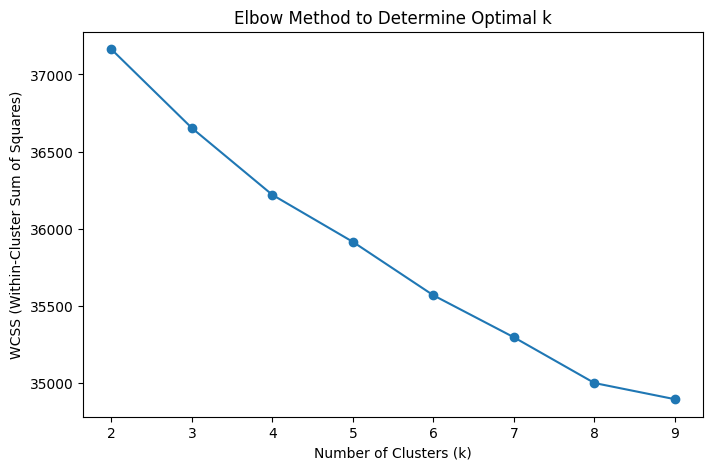

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
X = vectorizer.fit_transform(text_data)

print(f"TF-IDF Matrix Shape: {X.shape}")

wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

**Elbow Plot Analysis:** The selection of 5 clusters is justified by the elbow plot's evident bend at k = 5.

### 7.2 Apply K-Means Clustering

In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

clustered_data = pd.DataFrame({"Text": text_data, "Cluster": labels})

print(clustered_data.sample(10))  # 10 random clustered texts

                                                    Text  Cluster
35362                        financial analysis software        2
32243  record operational production data identifying...        0
27447  apply rope based safety technique using knot a...        4
16436  establish clear learning objective outcome les...        3
7042   style maintain groom wig hairpiece taking acco...        3
13956  calculate quote expected cost pricing term ass...        3
29439  apply filler sealant compound adhesive order f...        4
13263  establish clear learning objective outcome les...        3
509    plan organises gallery museum collection draft...        3
38454                     regulatory compliance software        2


### 7.3 Visualize Clusters using PCA

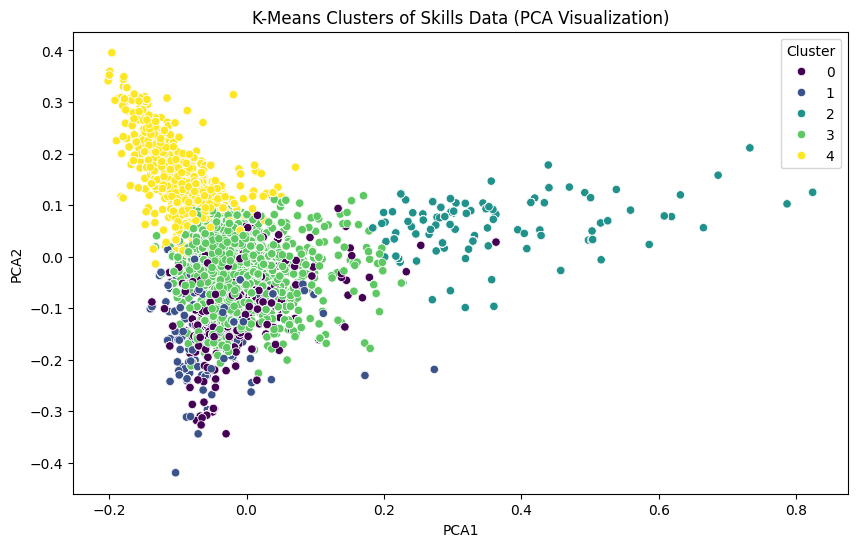


Cluster 0:
['review maintain operational record example staff inventory customer operation production performance financial technical maintenance data ensure information correct date meet reporting record keeping requirement new information recorded processed accordingly may also include ensuring record stored destroyed appropriately according information security privacy requirement', 'review maintain record document file ensuring detail information correct current proper labelling indexing categorisation completed ensure record stored destroyed appropriately according information security privacy requirement', 'review maintain financial account record document file ensuring detail information correct current proper labelling indexing categorisation completed ensure record meet legal regulatory obligation record keeping including information must collected financial record ensure record stored handled maintained destroyed according information security privacy requirement including c

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Converting to DataFrame
clustered_data["PCA1"] = X_pca[:, 0]
clustered_data["PCA2"] = X_pca[:, 1]

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=clustered_data, palette="viridis")
plt.title("K-Means Clusters of Skills Data (PCA Visualization)")
plt.show()

# Interpreting Clustering Results
for cluster in range(optimal_k):
    print(f"\nCluster {cluster}:")
    print(clustered_data[clustered_data["Cluster"] == cluster]["Text"].sample(5).tolist())

**Analysis of the Results:**

- **PCA Plot Cluster Visualisation:**
  - K-Means successfully categorised related texts, as evidenced by the PCA scatter plot's clearly defined clusters.
  - The close proximity of several clusters indicates that their texts are highly similar.
  - There are certain clusters that overlap, which could mean that some skill sets are comparable.

- **Interpretations of Clusters:**

  - Cluster 0: Tasks related to administration and record keeping, such as document and operational record maintenance.
  - Cluster 1: Technical Support & Healthcare (e.g., medical diagnostics, patient care).
  - Cluster 2: Technology and Software Tools (such as database administration, financial analysis, and software).
  - Cluster 3: Communication and Customer Service (e.g., promoting items, making recommendations).
  - Cluster 4: Maintenance & Handling of Equipment (e.g., solving problems, assembling equipment).

**Strengths and Weaknesses of the ASC Based on K-Means Analysis**

**Strengths:**
- **Clearly defined roles and skills:** Analysing occupational trends is made easier by the clustering's successful grouping of job descriptions, competences, and technology into meaningful groups.
- **Determining the Essential Job Duties:** Distinct work activities like administration, healthcare, technology, customer service, and equipment handling are highlighted by the clusters. This can aid in improving workforce development and training initiatives.
- **Using Technology in Workplaces**: A modern, changing workforce is reflected in the existence of a technology-focused cluster (Cluster 2), which shows a growing reliance on software, data management, and automation tools.
- **Scalability for Upcoming Research**: ASC is flexible enough to accommodate new job roles and abilities because the clustering process is simple to apply to new data.

**Weaknesses:**
- **Overlap Between Clusters:** Certain clusters overlap, suggesting that employment roles might have similar skill sets. Because of this, it could be challenging to discern between closely related job activities.
- **Difficulty in Handling Ambiguous Roles**: Certain professions are difficult to categorise into a single cluster because they call for a combination of multidisciplinary abilities (such as technical knowledge and management).

While more refinement utilising hybrid models (e.g., topic modelling + clustering) should increase classification accuracy and contextual understanding, the ASC dataset offers useful insights into occupational skills and roles.



## 8. **Comparing ASC with O*NET OnLine Dataset using NLP**

In order to categorise employment according to their abilities, responsibilities, and use of technology, occupational taxonomies like the Australian abilities Classification (ASC) and the O*NET OnLine dataset (USA) are utilised. This study examines job descriptions, skill sets, and work activities in order to compare ASC to US Taxonomy dataset using Natural Language Processing (NLP). Using Natural Language Processing (NLP), the ASC and ONET OnLine datasets are compared in order to examine job descriptions, skill requirements, and occupational structures across several taxonomies. In order to better match job roles, skills, and workforce development initiatives, this comparison helps discover similarities, variances, and gaps between the Australian (ASC) and U.S. classifications.

### 8.1 Load the ONET Dataset
A structured classification of US jobs is available in the O*NET OnLine dataset. The occupation "Data Scientist" (Code: 15-2051.00) is the subject of the dataset used in this investigation. Google Drive folder is mounted to read the dataset and load it using `pandas`.

In [ ]:
file_path = "/content/drive/My Drive/data/Data Scientists ONET-Online-15-2051.xlsx"  # Change the path if necessary
xls_onet = pd.ExcelFile(file_path)

# Loading each sheet into a dictionary of DataFrames
dfs_onet = {sheet_name: pd.read_excel(xls_onet, sheet_name) for sheet_name in xls_onet.sheet_names}

# Checking available sheets
dfs_onet.keys()

for sheet_name, df in dfs_onet.items():
    print(f"Sheet: {sheet_name}")
    print(df.head())
    print("\n")

Sheet: tasks_15-2051-00
                                                Task
0  Analyze, manipulate, or process large sets of ...
1  Apply feature selection algorithms to models p...
2  Apply sampling techniques to determine groups ...
3  Clean and manipulate raw data using statistica...
4  Compare models using statistical performance m...


Sheet: technology_skills_15-2051-00
      Section                           Category                  Example
0  Technology  Analytical or scientific software  Google Looker Analytics
1  Technology  Analytical or scientific software      IBM SPSS Statistics
2  Technology  Analytical or scientific software                 Kubeflow
3  Technology  Analytical or scientific software    Mathematical software
4  Technology  Analytical or scientific software                   Mlflow


Sheet: detailed_work_activities_15-205
                              Detailed Work Activity
0  Apply mathematical principles or statistical a...
1            Advise others on

The dataset contains the following sheets:
1. Tasks Sheet (`tasks_15-2051-00`): Contains a single column "Task" listing specific responsibilities of a data scientist.
2. Technology Skills Sheet (`technology_skills_15-2051-00`): "Technology" as the section, the type of the task, and examples are included.
3. Detailed Work Activities Sheet (`detailed_work_activities_15-205`): Contains a single column "Detailed Work Activity" describing tasks at a more granular level.
4. Work Activities Outline Sheet (`work_activities_outline_15-2051`): There are six columns, including "Importance" as the Numeric ranking of activity relevanc, "Work Activity" as the category of the activity, "Work Activity Description" as the explanation of the activity, "Intermediate Work Activity" - a mid-level description of the activity, "Detailed Work Activity" - the most specific description of a task and lastly the "Task Statement", implying how the task fits into the occupation."

### 8.2 Check Missing Data

Checking the data is essential before moving on to comparison and analysis in order to identify any discrepancies and address them appropriately, as this could cause problems for subsequent research. Therefore, one important step is to check for missing data.

In [ ]:
for sheet_name, df in dfs_onet.items():
    print(f"Missing values in sheet '{sheet_name}':")
    print(df.isnull().sum())
    print("\n")

Missing values in sheet 'tasks_15-2051-00':
Task    0
dtype: int64


Missing values in sheet 'technology_skills_15-2051-00':
Section     0
Category    0
Example     0
dtype: int64


Missing values in sheet 'detailed_work_activities_15-205':
Detailed Work Activity    0
dtype: int64


Missing values in sheet 'work_activities_outline_15-2051':
Importance                     0
Work Activity                  0
Work Activity Description      0
Intermediate Work Activity    33
Detailed Work Activity        33
Task Statement                33
dtype: int64




The `work_activities_outline_15-2051` sheet contained missing values in:

- Intermediate Work Activity (33 missing values)
- Detailed Work Activity (33 missing values)
- Task Statement (33 missing values)

Why Fill Missing Values with "Unknown"?

- Consistency: Guarantees that every row contains information for NLP analysis.
- Prevents Errors: NaN (null) values cannot be processed by some NLP models.
- Preserves Information Structure: Using "Unknown" to fill in rows keeps the dataset intact rather than deleting them.

### 8.3 Handle missing values

In [ ]:
# Handling missing values by filling with "Unknown"
for sheet_name, df in dfs_onet.items():
    for column in df.columns:
        df[column].fillna("Unknown", inplace=True)

# Verifying if missing values are handled
for sheet_name, df in dfs_onet.items():
    print(f"Missing values in sheet '{sheet_name}' after handling:")
    print(df.isnull().sum())
    print("\n")

Missing values in sheet 'tasks_15-2051-00' after handling:
Task    0
dtype: int64


Missing values in sheet 'technology_skills_15-2051-00' after handling:
Section     0
Category    0
Example     0
dtype: int64


Missing values in sheet 'detailed_work_activities_15-205' after handling:
Detailed Work Activity    0
dtype: int64


Missing values in sheet 'work_activities_outline_15-2051' after handling:
Importance                    0
Work Activity                 0
Work Activity Description     0
Intermediate Work Activity    0
Detailed Work Activity        0
Task Statement                0
dtype: int64




There are no more missing values in the O*NET dataset.

### 8.4 Preprocess ONET Dataset (Same as ASC)

Text preprocessing is used to standardise the data in order to compare ASC with USA taxonomy from O*NET. Preprocessing steps include converting to lowercase to uniformise all of the text. After that, special characters `(\W)` are eliminated to clear non-alphabetic characters and punctuation and numbers `(\d+)` are removed to prevent tokenisation from being impacted by numeric data.
In order to normalise spacing, extra spaces `(\s+)` are removed.
Text is broken up into separate words by `tokenisation`. `Stopwords` are removed to improve feature extraction by getting rid of common words like "the," "is," and "and." `Lemmatisation` is performed which is the process of reducing words to their most basic forms (for example, "running" → "run"). **Tokenization** and **lemmatization** enhance analysis accuracy. Thus, uniform formatting is ensured which makes comparison easier and the dataset is cleaned from unnecessary elements. Preprocessing both datasets identically ensures fair comparison.

In [ ]:
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\W', ' ', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
        return " ".join(tokens)
    return text

for sheet_name, df in dfs_onet.items():
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].apply(preprocess_text)

### 8.5 Compare Word Frequencies (ASC vs. O*NET)
Comparing word frequencies is essential for examining linguistic patterns in both datasets. By looking at the most frequently used terms in O*NET (Occupational Information Network) and ASC (Australian Skills Classification), we can determine the main distinctions and parallels in the use of terminology, recognise how different job classification systems have distinct skill descriptions, assess the representation of occupational roles, responsibilities, and necessary competences in each dataset and describe any possible overlaps or gaps between the two frameworks.

In order to align similar concepts across ASC and O*NET, the following comparisons were selected:
- **Task vs. Occupation Descriptions:** Examines how job responsibilities are defined by contrasting O*NET's task definitions with ASC's occupational descriptions.
- **Technology Skills vs. Core Competency Descriptions:** Compares O*NET's technology-related competencies with ASC's definition of core skills.
- **Technical Tool Extended Descriptions vs. Detailed Work Activities:** To find areas where technology-related abilities overlap, ASC's technology tool descriptions and O*NET's work activities are compared.
- **Task Statement from Work Activities Comparing Work Activities with Skill Statement in Specialist tasks hierarchy:** compares O*NET's work activities with ASC's specialised tasks in order to identify differences in job-specific duties.


The first phases in splitting up text into words are `Tokenisation` and `Frequency` Calculation. Python's `Counter` from the `collections` module is used to count occurrences. For the sake of sorting and visualisation, ASC and O*NET word frequencies are kept in different dataframes. For comparison, pertinent columns from the USA taxonomy and ASC datasets were merged into text strings. Empty entries were used to handle missing values. To visualise the top 15 most frequent words in both datasets, a bar plot was created using seaborn. For easy visual separation, taxonomy used in the USA is represented by red bars and ASC by blue bars. For convenience, a legend was included.

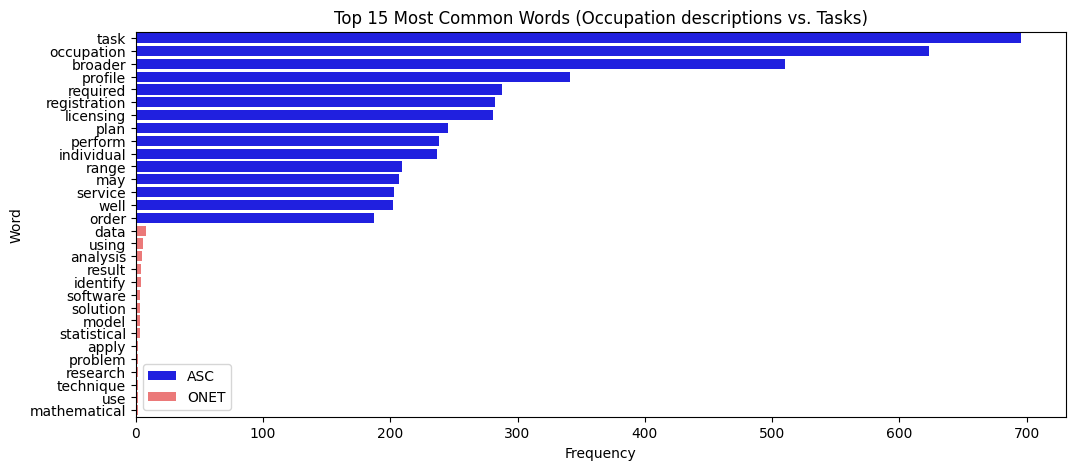

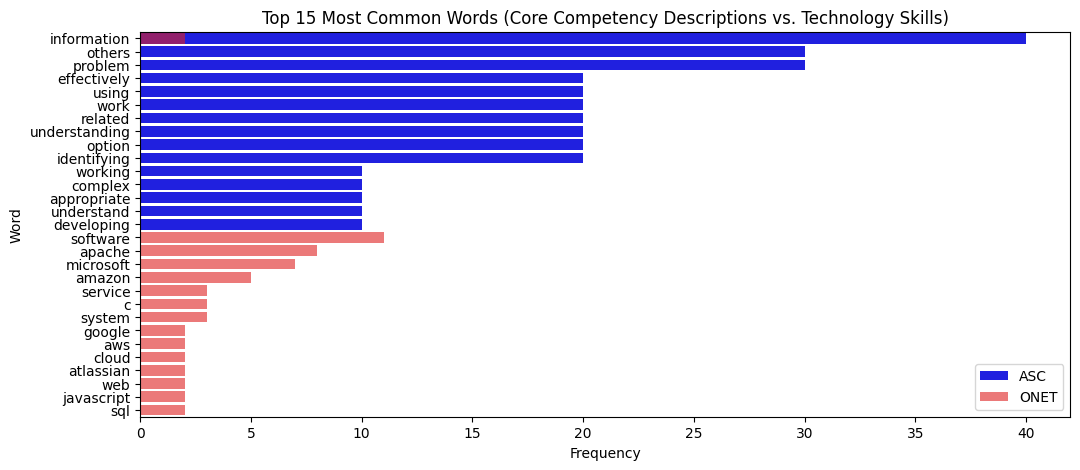

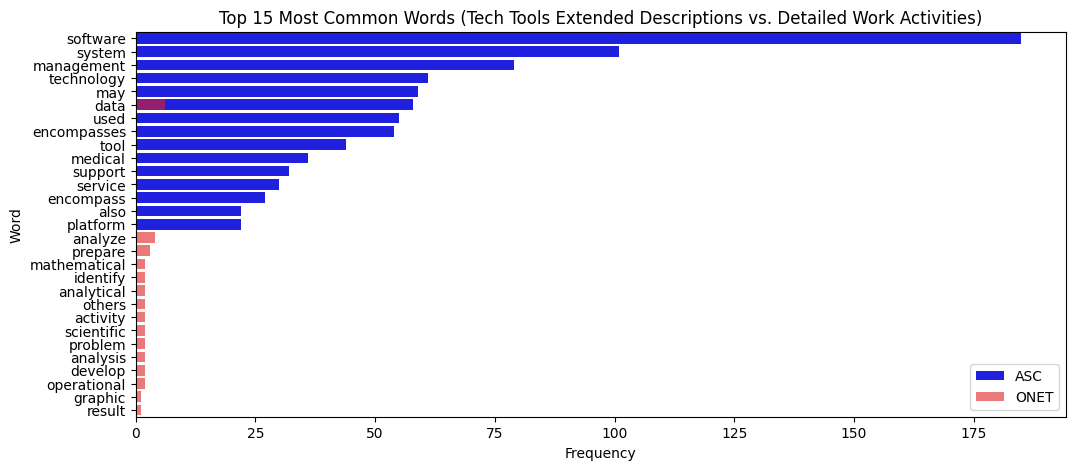

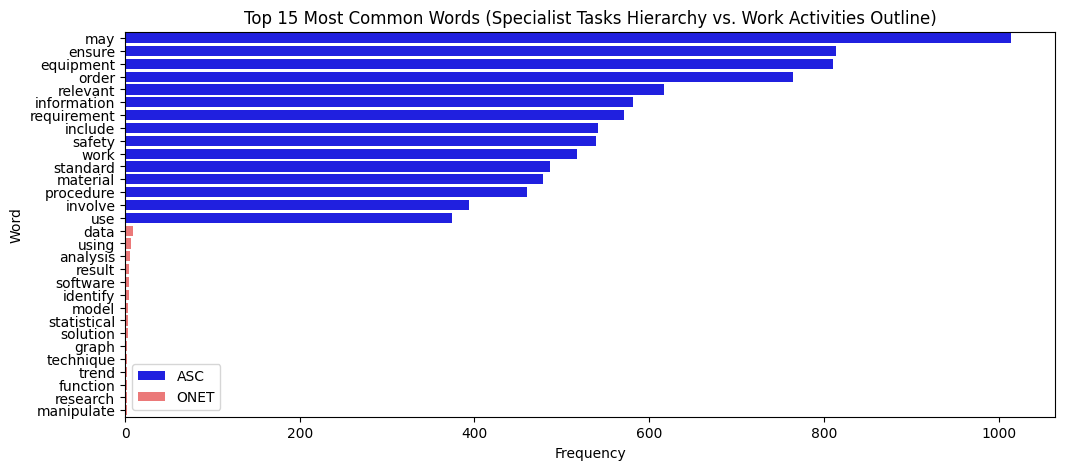

In [ ]:
def compare_word_frequencies(asc_text, onet_text, title):

    # Word frequencies
    asc_word_freq = Counter(asc_text.split())
    onet_word_freq = Counter(onet_text.split())

    # Converting to DataFrame
    asc_word_freq_df = pd.DataFrame(asc_word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)
    onet_word_freq_df = pd.DataFrame(onet_word_freq.items(), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)

    # Plotting word frequency comparison
    plt.figure(figsize=(12, 5))
    sns.barplot(x=asc_word_freq_df["Frequency"][:15], y=asc_word_freq_df["Word"][:15], color="blue", label="ASC")
    sns.barplot(x=onet_word_freq_df["Frequency"][:15], y=onet_word_freq_df["Word"][:15], color="red", label="ONET", alpha=0.6)
    plt.title(title)
    plt.legend()
    plt.show()


# Comparison 1: Occupation descriptions vs. Tasks
asc_text = " ".join(dfs["Occupation descriptions"]["ANZSCO Description"].dropna())
onet_text = " ".join(dfs_onet["tasks_15-2051-00"]["Task"].dropna())
compare_word_frequencies(asc_text, onet_text, "Top 15 Most Common Words (Occupation descriptions vs. Tasks)")

# Comparison 2: Core Competency Descriptions vs. Technology Skills
asc_text = " ".join(dfs["Core competency descriptions"]["Core Competency Description"].dropna())
onet_text = " ".join(dfs_onet["technology_skills_15-2051-00"]["Example"].dropna())
compare_word_frequencies(asc_text, onet_text, "Top 15 Most Common Words (Core Competency Descriptions vs. Technology Skills)")

# Comparison 3: Tech Tools Extended Descriptions vs. Detailed Work Activities
asc_text = " ".join(dfs["Tech tools heirarchy"]["Technology Tool Extended Description"].dropna())
onet_text = " ".join(dfs_onet["detailed_work_activities_15-205"]["Detailed Work Activity"].dropna())
compare_word_frequencies(asc_text, onet_text, "Top 15 Most Common Words (Tech Tools Extended Descriptions vs. Detailed Work Activities)")

# Comparison 4: Specialist Tasks Hierarchy vs. Work Activities Outline
asc_text = " ".join(dfs["Specialist tasks hierarchy"]["Skill Statement"].dropna())
onet_text = " ".join(dfs_onet["work_activities_outline_15-2051"]["Task Statement"].dropna())
compare_word_frequencies(asc_text, onet_text, "Top 15 Most Common Words (Specialist Tasks Hierarchy vs. Work Activities Outline)")

**Analysis of Results:**
- **Occupation Descriptions vs. Tasks:**
  - Words like "task," "occupation," "required," and "licensing" are more common in ASC than in O*NET.
  - O*NET highlights a focus on data-driven employment by emphasising analytical phrases ("data", "using", "analysis").
  - O*NET concentrates more on certain data-related skills, whereas ASC offers more comprehensive task-based descriptions.

- **Core Competency Descriptions vs. Technology Skills:**
  - ASC places a strong emphasis on more general skills including *information, problem, effectively, work, understanding*.
  - A greater emphasis on technical tools is indicated by ONET's emphasis on *software, apache, and microsoft, amazon*.
  - The findings imply that although O*NET enumerates particular technologies, ASC concentrates on conceptual understanding.

- **Tech Tools Extended Descriptions vs. Detailed Work Activities:**
  - *Software, system, management, and technology* are more common in ASC, which reflects a wide range of technology applications.
  - ONET emphasises analytical features by using terms like *analyze, prepare, mathematical.*
  - O*NET describes more structured activities, whereas ASC uses more general terms.
- **Specialist Tasks Hierarchy vs. Work Activities Outline:**
  - ASC frequently contains terms like "may," "ensure," "equipment," "requirement," "safety," and "procedure," which suggests a regulatory focus.
  - In order to better connect with technological and analytical functions, O*NET emphasises data, analysis, result, software, model.
  - O*NET prioritises problem-solving and technological integration, whereas ASC concentrates on compliance and work execution.

The comparison identifies the main differences between ASC and ONET. The vocabulary employed by ASC is more general, task-oriented, and compliance-focused. ONET prioritises data-driven decision-making, specialised technologies, and analytical abilities. Disparities show that O*NET offers comprehensive job-specific competencies, particularly in technical domains, while ASC is more generalised for a variety of occupations.This analysis helps to harmonise worldwide job classifications by offering insightful information about how various occupational frameworks describe skills, abilities, and tasks.




### 8.6 Compare Topic Modeling (ASC vs. ONET)
By revealing underlying themes and structures in textual data, topic modelling enables us to compare the definitions of vocations, skills, and competencies provided by ASC and O*NET. We may examine the primary themes in both datasets and pinpoint regions of resemblance and difference by using Latent Dirichlet Allocation (LDA). This comparison sheds light on how work responsibilities, competencies, and technology needs are represented by the both taxonomies.

To ensure a comprehensive comparison, the datasets selected include key textual descriptions from both ASC and O*NET, such as, Occupation descriptions, Core competency descriptions, Specialist task hierarchy, Technology tools descriptions from the ASC data and Tasks, Examples of Technology skills, Detailed Work Activities, Task Statements from Work activity descriptions.

First, pertinent text is extracted from the ASC and USA taxonomy datasets, and the text is tokenised to separate terms in order to prepare the data. Tokenised text is translated into a bag-of-words representation (word frequency counts) and mapped to distinct IDs to create a dictionary. Five topics each are used to train distinct LDA models for ASC and O*NET. To guarantee convergence, the model is then run ten times. To comprehend the primary themes in both datasets, the top words for each topic are printed. Finally the generated interactive topics from both datasets are visualised.

In [30]:
onet_text_data = []
onet_text_data.extend(dfs_onet["tasks_15-2051-00"]["Task"].dropna().tolist())
onet_text_data.extend(dfs_onet["technology_skills_15-2051-00"]["Example"].dropna().tolist())
onet_text_data.extend(dfs_onet["detailed_work_activities_15-205"]["Detailed Work Activity"].dropna().tolist())
onet_text_data.extend(dfs_onet["work_activities_outline_15-2051"]["Work Activity Description"].dropna().tolist())
onet_text_data.extend(dfs_onet["work_activities_outline_15-2051"]["Task Statement"].dropna().tolist())

print(f"Total ASC documents: {len(text_data)}")
print(f"Total ONET documents: {len(onet_text_data)}")


# Converting Text to Bag-of-Words & Train LDA Models

# Tokenization function
def tokenize(text):
    return text.split()

asc_tokens = [tokenize(text) for text in text_data]
onet_tokens = [tokenize(text) for text in onet_text_data]

# Dictionary and corpus for ASC
asc_dict = corpora.Dictionary(asc_tokens)
asc_corpus = [asc_dict.doc2bow(text) for text in asc_tokens]

# Dictionary and corpus for ONET
onet_dict = corpora.Dictionary(onet_tokens)
onet_corpus = [onet_dict.doc2bow(text) for text in onet_tokens]

# LDA models for ASC and ONET
lda_asc = LdaModel(corpus=asc_corpus, id2word=asc_dict, num_topics=5, passes=10, random_state=42)
lda_onet = LdaModel(corpus=onet_corpus, id2word=onet_dict, num_topics=5, passes=10, random_state=42)

# ASC Topics
print("\n🔹 ASC Topics:")
for idx, topic in lda_asc.print_topics():
    print(f"ASC Topic {idx+1}: {topic}")

# O*NET Topics
print("\n🔹 ONET Topics:")
for idx, topic in lda_onet.print_topics():
    print(f"ONET Topic {idx+1}: {topic}")

Total ASC documents: 39741
Total ONET documents: 185

🔹 ASC Topics:
ASC Topic 1: 0.026*"material" + 0.020*"requirement" + 0.018*"specification" + 0.017*"equipment" + 0.016*"work" + 0.016*"ensure" + 0.015*"tool" + 0.015*"order" + 0.015*"design" + 0.013*"software"
ASC Topic 2: 0.038*"equipment" + 0.023*"safety" + 0.015*"ensure" + 0.015*"may" + 0.015*"standard" + 0.013*"procedure" + 0.010*"work" + 0.010*"include" + 0.009*"use" + 0.009*"regulation"
ASC Topic 3: 0.016*"may" + 0.014*"information" + 0.012*"relevant" + 0.012*"need" + 0.011*"individual" + 0.010*"technology" + 0.010*"service" + 0.009*"learning" + 0.009*"student" + 0.009*"order"
ASC Topic 4: 0.036*"software" + 0.026*"information" + 0.023*"relevant" + 0.021*"data" + 0.020*"patient" + 0.019*"record" + 0.017*"management" + 0.016*"medical" + 0.013*"system" + 0.013*"may"
ASC Topic 5: 0.029*"management" + 0.024*"software" + 0.023*"project" + 0.020*"activity" + 0.019*"may" + 0.018*"staff" + 0.017*"resource" + 0.016*"task" + 0.015*"ensur

### 8.7.1 Visualize Topics Using pyLDAvis for ASC

In [33]:
# ASC LDA visualization
lda_vis_asc = gensimvis.prepare(lda_asc, asc_corpus, asc_dict)
pyLDAvis.display(lda_vis_asc)

### 8.7.2 Visualize Topics Using pyLDAvis for O*NET

In [32]:
# O*NET LDA visualization
lda_vis_onet = gensimvis.prepare(lda_onet, onet_corpus, onet_dict)
pyLDAvis.display(lda_vis_onet)

**Analysis of Results**

- Terms pertaining to *software, information, data, patient, management, medical* are among the topics covered in ASC. The dataset focusses on operational procedures, compliance, and job activities.
- Topics in USA taxonomy focus on *data, result, information, material, system*. It emphasises research approaches, analytical procedures, and technology-driven abilities.
- O*NET is more data-driven, analytical, and technology-centric, while ASC is more concerned with job performance, practical duties, and compliance-related issues.
- While ASC covers a wider range of job-specific skills, O*NET places more emphasis on programming, statistical modelling, and data-driven decision-making.
- Terms pertaining to information, software, and management show some overlap, suggesting that there is shared knowledge and competence.

The comparison of topic modelling reveals how ASC and USA taxonomy differ in their areas of emphasis. While O*NET is more focused on data analytics, computing abilities, and scientific techniques, ASC offers a structured approach to job tasks with a focus on operational standards and practical execution. By combining the advantages of both datasets, these insights can aid in the improvement of occupational taxonomies.


### 8.8 Compare Clustering (ASC vs. ONET)

K-Means clustering is used to compare ASC and O*NET in order to better comprehend the structural and content-based differences between the two datasets. Finding trends in the occupational descriptions, competencies, and skills through clustering aids in determining how well Australian skills classification and the taxonomy used in the USA align. Planning the workforce, creating policies, and guaranteeing uniformity in occupational classification across various geographies all depend on this.

Text data from ASC and O*NET that include descriptions of occupations, definitions of competencies, and necessary skills are included in the comparison. The chosen data makes it possible to compare the two frameworks directly in terms of:

- Occupation descriptions, including roles and skills
- Skills and Competencies Competencies and Specialised Tasks
- Technology Tools (requirements for jobs involving technology)
- Work Activities (Activities and responsibilities pertaining to the job)

By grouping related occupational tasks together through clustering, this selection makes direct comparison possible.

### 8.8.1 Extract & Preprocess Text Data

Relevant occupation descriptions, skills, and technology tool data are extracted from both ASC and O*NET and then combined into a single corpus. Next, this data is converted to **TF-IDF Vectors (Term Frequency-Inverse Document Frequency)** to transform the text data into numerical form for clustering. Features are limited to the most frequent 2,000 words to maintain computational efficiency. **Elbow** Method is used to determine the optimal number of clusters by plotting **Within-Cluster Sum of Squares (WCSS)**.

In [34]:
# Text from ASC
asc_text_data = []
asc_text_data.extend(dfs["Occupation descriptions"]["ANZSCO Description"].dropna().tolist())
asc_text_data.extend(dfs["Core competency descriptions"]["Core Competency Description"].dropna().tolist())
asc_text_data.extend(dfs["Specialist tasks hierarchy"]["Skill Statement"].dropna().tolist())
asc_text_data.extend(dfs["Specialist tasks data"]["Skills Statement"].dropna().tolist())
asc_text_data.extend(dfs["Tech tools heirarchy"]["Technology Tool Extended Description"].dropna().tolist())

# Text from ONET
onet_text_data = []
onet_text_data.extend(dfs_onet["tasks_15-2051-00"]["Task"].dropna().tolist())
onet_text_data.extend(dfs_onet["technology_skills_15-2051-00"]["Example"].dropna().tolist())
onet_text_data.extend(dfs_onet["detailed_work_activities_15-205"]["Detailed Work Activity"].dropna().tolist())
onet_text_data.extend(dfs_onet["work_activities_outline_15-2051"]["Work Activity Description"].dropna().tolist())
onet_text_data.extend(dfs_onet["work_activities_outline_15-2051"]["Task Statement"].dropna().tolist())

combined_text = asc_text_data + onet_text_data

print(f"Total ASC documents: {len(asc_text_data)}")
print(f"Total ONET documents: {len(onet_text_data)}")
print(f"Total Combined Documents: {len(combined_text)}")


# Text data to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=2000, stop_words="english")
X_combined = vectorizer.fit_transform(combined_text)

print(f"TF-IDF Matrix Shape: {X_combined.shape}")

Total ASC documents: 33980
Total ONET documents: 185
Total Combined Documents: 34165
TF-IDF Matrix Shape: (34165, 2000)


### 8.8.2 Determine Optimal k Using Elbow Method

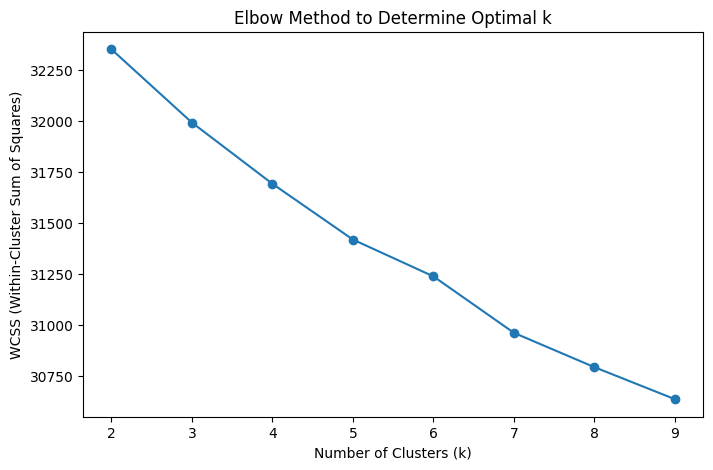

In [35]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_combined)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

### 8.8.3 Perform K-Means Clustering

The optimal `k = 5` is selected based on the point of inflection in the elbow graph. The `TF-IDF` vectorised with k=5 is used to train the `K-Means` method, and each document is allocated to a cluster. In order to visualise how ASC and O*NET descriptions agree, high-dimensional TF-IDF data is reduced to 2D using **Principal Component Analysis (PCA)**, and the clusters are shown using a scatter plot. Sample text from each cluster is extracted to interpret common themes and patterns and how occupations from ASC and ONET were distributed across clusters are compared.


In [36]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_combined)

clustered_data = pd.DataFrame({"Text": combined_text, "Cluster": labels})

print(clustered_data.sample(10))  # 10 random clustered texts

                                                    Text  Cluster
17922  provide instruction guidance direction non cli...        2
17476  provide care support individual pregnancy chil...        1
17600  conduct physical examination patient client or...        1
25317  select feed material product production equipm...        0
2816   identify opportunity artificial intelligence m...        4
19450  conduct physical examination patient client or...        1
29831  exchange relevant knowledge idea insight colle...        4
21111  promote educational institution program order ...        4
5792   deliver implement program policy service respe...        4
30355  select appropriate production equipment machin...        0


### 8.8.4 Visualize Clusters Using PCA

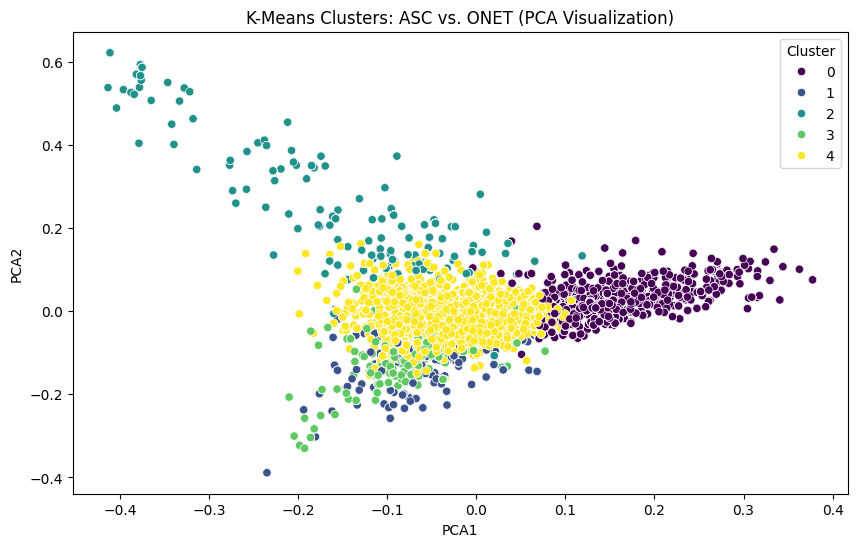

In [37]:
# Since TF-IDF vectors are high-dimensional, we reduce them to 2D using PCA for visualization.

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca_combined = pca.fit_transform(X_combined.toarray())

# Convert to DataFrame
clustered_data["PCA1"] = X_pca_combined[:, 0]
clustered_data["PCA2"] = X_pca_combined[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=clustered_data, palette="viridis")
plt.title("K-Means Clusters: ASC vs. ONET (PCA Visualization)")
plt.show()

### 8.8.5 Interpret Clustering Results

In [39]:
for cluster in range(optimal_k):
    print(f"\n Cluster {cluster}:")
    print(clustered_data[clustered_data["Cluster"] == cluster]["Text"].sample(5).tolist())  # Show 5 sample texts per cluster


 Cluster 0:
['identify prepare hazardous material item containing hazardous material processing disposal complying safety requirement regulation procedure example disassemble computer computer component identifying e waste containing material lead mercury separating appropriate safe disposal', 'examine test measure physical characteristic material product compare specification standard ensure identity quality effectiveness select appropriate examination method equipment consider factor dimension property grade shape composition feature flaw colour size weight texture identify non conformance issue anomaly defect deviation note necessary action', 'perform engraving etching carve permanent design text marking material workpiece product position hold clamp workpiece measure item ensure accuracy design placement carve hand using technology specialised tool equipment according job requirement material desired effect follow standard operating procedure work health safety requirement ensure 

**Analysis of the Results:**

1. **Cluster Visualization:** A clear distribution of occupational descriptions across five clusters can be seen in the PCA visualisation.
Although ASC and O*NET share certain similarities, ASC descriptions seem to be concentrated in specific clusters, indicating a distinct classification strategy.
2. **Key Observations from Clustering:**
  - **Cluster 0:** Shows alignment in responsibilities involving compliance, safety, and physical labour by emphasising manual labour and safety regulations.
  - **Cluster 1:** Healthcare-related roles are seen in Cluster 1, indicating that ASC and O*NET are comparable in this regard.
  - **Cluster 2:** Shows a notable divergence from O*NET's emphasis on statistical modelling by primarily covering data analysis and computational operations.
  - **Cluster 3:** Concentrates ASC's focus on competency frameworks and pertains to education, training, and policy creation.
  - **Cluster 4:** Consists of jobs using technology, such as those involving software and artificial intelligence, with notable distinctions between ASC and O*NET's definitions.
3. **Strengths and Weaknesses Identified**:
  - Strengths:
    - Themed distinctions between ASC and O*NET are successfully identified using the clustering method.
    - In certain areas, such as safety and healthcare, ASC descriptions are in good alignment.
    - Specialisation in ASC that might not exist in O*NET is highlighted by the clustering method.
  - Weaknesses:
    - In contrast to ASC descriptions, O*NET places more emphasis on technical and analytical abilities.
    - O*NET's intricate task-oriented clusters are more specialised than ASC clusters.
    - Significant separation between several clusters suggests that ASC and O*NET have fundamentally different work role structures.

ASC and O*NET differ significantly in terms of occupational structure and competences, according to the K-Means clustering study. While many work functions are highly aligned, others show notable differences, especially in data-centric and technological industries. This investigation offers insightful information about how to harmonise job classification systems to enhance policymaking and workforce development.


## **9. Interpretive Summary: Key Skills for Future Data Scientists & AI's Role in Reshaping Tasks**

Artificial intelligence (AI) developments, automation, and the increasing demand for transdisciplinary skills will all influence data science in the future. When the **ASC** dataset and the subset of the **taxonomy used in the USA (O*NET)** dataset are compared, a significant trend becomes apparent: ASC places more emphasis on broader competencies like problem-solving, decision-making, and business-oriented applications, whereas ONET places more emphasis on technical skills like programming, statistical modelling, and data analysis. Regular data processing chores (such as data cleansing, feature selection, and statistical model evaluation) will likely become more automated due to AI's expanding role. This will place a greater emphasis on domain-specific knowledge, ethical AI practices, and AI-driven decision-making.

Future data scientists will need to combine cutting-edge machine learning methods with commercial tech-savvy and ethical considerations as AI develops. Stronger regulatory compliance abilities will be required as the significance of bias detection, explainable AI (XAI), and AI governance increases. Experts in deep learning, generative AI, and cloud-based data solutions are among the fastest-growing job roles, according to research from the **World Economic Forum's Future of Jobs Report (2023)**. This tendency is supported by graphs from the ASC vs. O*NET comparison, which demonstrate how ASC's clusters concentrate more on generalised problem-solving and workplace competencies, whereas ONET emphasises AI-powered software tools (such as Apache, TensorFlow, and AWS). In order to bridge the gap between machine intelligence and human decision-making, data scientists must become proficient in evolving AI frameworks, adjust to AI-driven processes, and gain multidisciplinary knowledge.

Using word clouds and bar graphs, the following scripts visualises the essential abilities required of future data scientists by extracting the most common technical versus business-oriented phrases from ASC and O*NET. Core competency descriptions is examined from the ASC since it provides information on necessary skills and proficiencies and tasks from the ONET as it lists specific responsibilities of a data scientist.

### 9.1 Word Cloud of Key Skills from ASC vs. O*NET

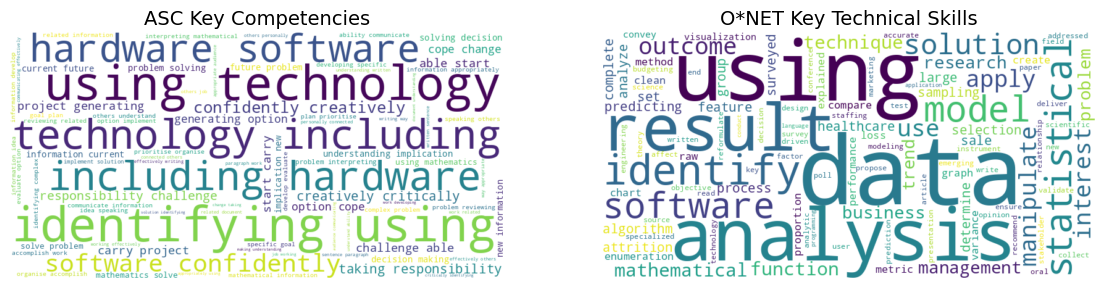

In [40]:
# Texts from ASC and O*NET
asc_text = " ".join(dfs["Core competency descriptions"]["Core Competency Description"].dropna())
onet_text = " ".join(dfs_onet["tasks_15-2051-00"]["Task"].dropna())

wordcloud_asc = WordCloud(width=800, height=400, background_color="white").generate(asc_text)
wordcloud_onet = WordCloud(width=800, height=400, background_color="white").generate(onet_text)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].imshow(wordcloud_asc, interpolation="bilinear")
ax[0].set_title("ASC Key Competencies", fontsize=14)
ax[0].axis("off")

ax[1].imshow(wordcloud_onet, interpolation="bilinear")
ax[1].set_title("O*NET Key Technical Skills", fontsize=14)
ax[1].axis("off")

plt.show()

### 9.2 Compare Frequency of AI & Data Science-Related Terms

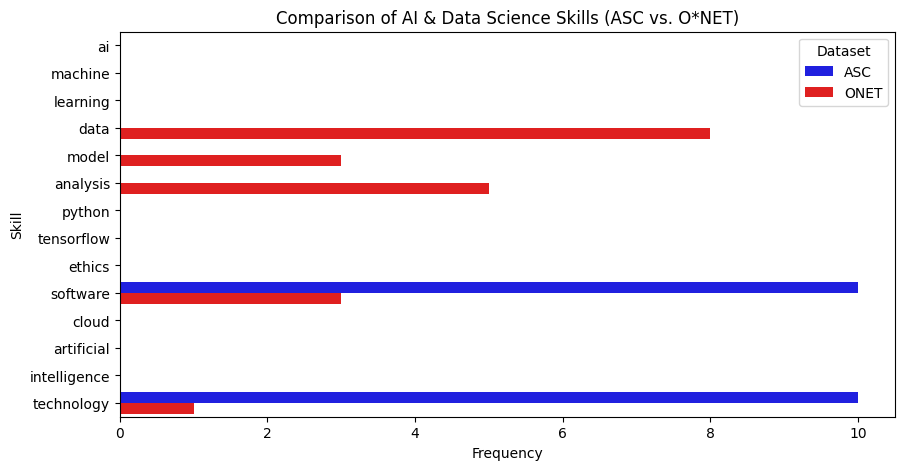

In [46]:
# Tokenize words
asc_words = asc_text.split()
onet_words = onet_text.split()

# Count word frequencies
asc_word_freq = Counter(asc_words)
onet_word_freq = Counter(onet_words)

# Top AI-related keywords
keywords = ["ai", "machine", "learning", "data", "model", "analysis", "python", "tensorflow", "ethics", "software", "cloud", "artificial", "intelligence", "technology"]

# Word counts
asc_counts = [asc_word_freq.get(word.lower(), 0) for word in keywords]
onet_counts = [onet_word_freq.get(word.lower(), 0) for word in keywords]

df_freq = pd.DataFrame({"Skill": keywords, "ASC": asc_counts, "ONET": onet_counts}).melt(id_vars="Skill", var_name="Dataset", value_name="Frequency")

plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Skill", hue="Dataset", data=df_freq, palette=["blue", "red"])
plt.title("Comparison of AI & Data Science Skills (ASC vs. O*NET)")
plt.show()

### **9.3 Conclusion from Word Cloud Analysis and Bar Chart on AI & Data Science Skills**

Key skill focus areas for each framework are revealed by the word cloud analysis of the ASC and O*NET datasets. ASC places a strong emphasis on technology-related skills like "hardware," "software," "identifying," and "technology," which suggests a more comprehensive emphasis on technical competence and system administration. Conversely, ONET emphasises analytical and data-centric abilities; keywords such as "data," "analysis," "model," "statistical," and "model" imply a close connection to data science, predictive modelling, and quantitative problem-solving.

According to the bar chart comparing AI and data science skills, O*NET has more data science-related phrases like "data," "analysis," and "model," which supports its emphasis on statistical methods and business applications. The under-representation of contemporary AI-specific phrases like "machine," "learning," "python," and "tensorFlow" in both datasets suggests a possible lack of explicit integration of state-of-the-art AI technologies. This emphasises the necessity of ongoing curriculum revisions to incorporate cloud computing, sophisticated AI technologies, and ethical AI considerations in workforce training in the future.

## References

1. *Current skills shortages.* (2023, November 22). Jobs and Skills Australia. https://www.jobsandskills.gov.au/publications/towards-national-jobs-and-skills-roadmap-summary/current-skills-shortages
2. *15-2051.00 - Data Scientists.* https://www.onetonline.org/link/summary/15-2051.00
3. World Economic Forum. (2023). Future of Jobs Report 2023. *In Future of Jobs Report.* https://www3.weforum.org/docs/WEF_Future_of_Jobs_2023.pdf
